In [14]:
import numpy as np
from numpy import random
import pandas as pd
from collections import Counter
import scipy
from random import choice
from scipy import stats
from scipy.stats import binom , poisson , norm , t
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

In [15]:
os.getcwd()

'C:\\Users\\HP\\OneDrive\\Desktop\\CREDIT CASE STUDY'

In [16]:
os.chdir(r"C:\Users\HP\OneDrive\Desktop\CREDIT CASE STUDY")

<h3><center>loading the datasets</center></h3>

In [17]:
dfprev= pd.read_csv("previous_application.csv")

In [18]:
dfprev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [19]:
dfapp = pd.read_csv("application_data.csv")

In [20]:
dfapp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Verifying the total count of both rows and columns present in the dataset.

In [21]:
rows_column1 = dfprev.shape
print("Rows : ",rows_column1[0])
print("Columns : ",rows_column1[1])

Rows :  1670214
Columns :  37


In [22]:
rows_column2 = dfapp.shape
print("Rows : ",rows_column2[0])
print("Columns : ",rows_column2[1])

Rows :  307511
Columns :  122



Data Cleaning on Previous_application dataset
Performing data cleaning operations on the Previous_application dataset is essential for ensuring the integrity and accuracy of the information within it. 

In [23]:
dfprev.describe

<bound method NDFrame.describe of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1          

In [24]:
dfprev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [25]:
#Calculate the number of null (missing) values for each column in the DataFrame dfprev and store the results in dfprev_null.
dfprev_null = dfprev.isnull().sum()
dfprev_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [26]:
dfprev_percent = round((100*dfprev.isnull().sum()/len(dfprev)),2)
dfprev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [27]:
print(len(dfprev.columns))

37


In [28]:
#Eliminate any null values present in the dataset when their proportion surpasses 20%.
dfprev=dfprev.loc[:,dfprev.isnull().mean() <= .20]

In [29]:
#Column Count After Null Value Removal
print(len(dfprev.columns))

23


In [30]:
# Checking the data again
round((100*dfprev.isnull().sum()/len(dfapp)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.11
dtype: float64

<h3>After checking the previous application data, We removed the columns which contains null values more than specific percent rang</h3>

In [103]:
dfprev['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [104]:
dfprev = dfprev.drop(dfprev[dfprev.NAME_CASH_LOAN_PURPOSE=="XNA"].index)
dfprev = dfprev.drop(dfprev[dfprev.NAME_CASH_LOAN_PURPOSE=="XAP"].index)

<h3>Data Cleaning on 
Application data</h3>

In [31]:
dfapp.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [32]:
dfapp.isnull().sum()
#checking and getting the count of the null vaues in each columns with their names

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [33]:
dfapp.columns
#checking the names of all the columns 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [34]:
# calculating the percentage of null values due to their large presence in the dataset.
df_percent = np.round((100*dfapp.isnull().sum()/len(dfapp)),2)

In [35]:
df_percent

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [36]:
len(df_percent)

122

In [37]:
dfapp.isnull().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [38]:
# removing values more than 35%
dfapp = dfapp.loc[:,dfapp.isnull().mean() <= .35]

In [39]:
# Checking the data again
round((100*dfapp.isnull().sum()/len(dfapp)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 73, dtype: float64

In [40]:
len(dfapp.columns)

73

<h4>Replacing Missing Values</h4>

In [41]:
# Checking the Name_Type_suite mode 
dfapp.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [42]:
dfapp.NAME_TYPE_SUITE.fillna(value='Unaccompanied', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16532\3168884291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfapp.NAME_TYPE_SUITE.fillna(value='Unaccompanied', inplace=True)


In [43]:
dfapp.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

np.float64(0.006402448193930645)

In [44]:
dfapp.loc[:, 'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = \
    dfapp.loc[:, 'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)


Text(0.5, 0, 'AMT_GOODS_PRICE')

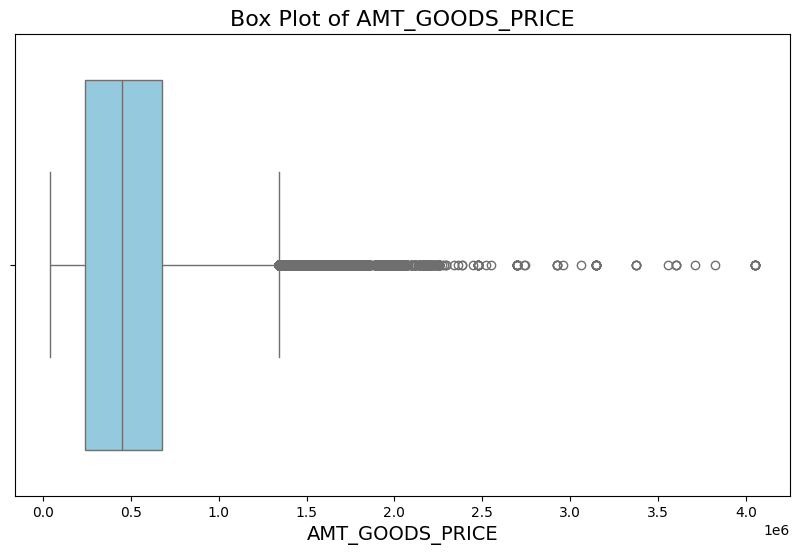

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AMT_GOODS_PRICE', data=dfapp, color='skyblue')
plt.title('Box Plot of AMT_GOODS_PRICE', fontsize=16)
plt.xlabel('AMT_GOODS_PRICE', fontsize=14)

In [46]:
dfapp.AMT_GOODS_PRICE.median()

np.float64(450000.0)

In [47]:
dfapp['AMT_GOODS_PRICE'].fillna(dfapp.AMT_GOODS_PRICE.median(), inplace=True)
# We are replacing missing values with median as if we replace with mean, it gets affected by outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_16532\1710512807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfapp['AMT_GOODS_PRICE'].fillna(dfapp.AMT_GOODS_PRICE.median(), inplace=True)


Text(0.5, 0, 'AMT_ANNUITY')

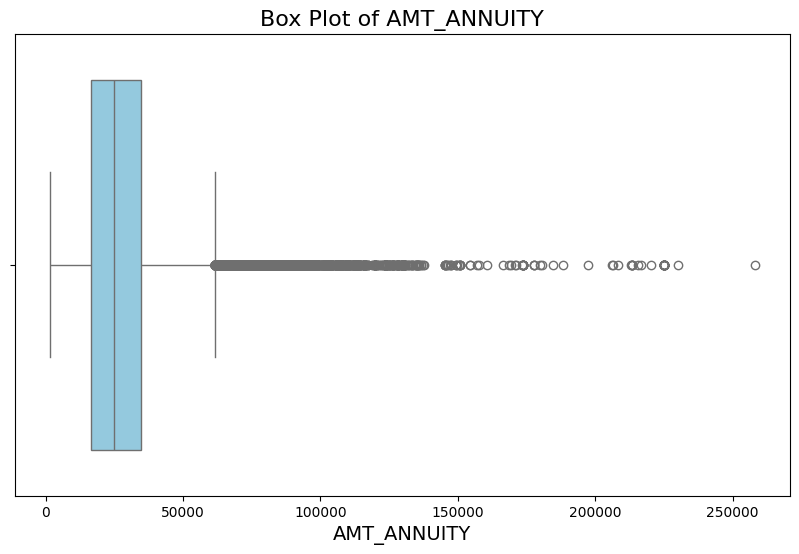

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AMT_ANNUITY', data=dfapp, color='skyblue')
plt.title('Box Plot of AMT_ANNUITY', fontsize=16)
plt.xlabel('AMT_ANNUITY', fontsize=14)

In [50]:
dfapp.AMT_ANNUITY.mean()

np.float64(27108.573909183444)

In [51]:
dfapp.AMT_ANNUITY.median()

np.float64(24903.0)

In [53]:
dfapp['AMT_ANNUITY'].fillna(dfapp.AMT_ANNUITY.median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16532\2506011992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfapp['AMT_ANNUITY'].fillna(dfapp.AMT_ANNUITY.median(), inplace=True)


In [54]:
round(100*dfapp.isnull().sum()/len(dfapp),2)

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 73, dtype: float64

<h4>Checking the data types of columns</h4>

In [55]:
dfapp.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(dfapp.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

dfapp.AMT_REQ_CREDIT_BUREAU_MON.fillna(dfapp.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

dfapp.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(dfapp.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

dfapp.AMT_REQ_CREDIT_BUREAU_DAY.fillna(dfapp.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

dfapp.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(dfapp.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

dfapp.AMT_REQ_CREDIT_BUREAU_QRT.fillna(dfapp.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

dfapp.NAME_TYPE_SUITE.fillna(dfapp.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

dfapp.OBS_30_CNT_SOCIAL_CIRCLE.fillna( dfapp.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

dfapp.DEF_30_CNT_SOCIAL_CIRCLE.fillna( dfapp.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

dfapp.OBS_60_CNT_SOCIAL_CIRCLE.fillna( dfapp.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

dfapp.DEF_60_CNT_SOCIAL_CIRCLE.fillna( dfapp.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

dfapp.CNT_FAM_MEMBERS.fillna(dfapp.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

dfapp.DAYS_LAST_PHONE_CHANGE.fillna(dfapp.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

dfapp.EXT_SOURCE_2.fillna(dfapp.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

C:\Users\HP\AppData\Local\Temp\ipykernel_16532\2733303033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfapp.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(dfapp.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
C:\Users\HP\AppData\Local\Temp\ipykernel_16532\2733303033.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

In [58]:
# Checking if there are still null values or not in the dataframe accept column "OCCUPATION_TYPE"
(dfapp.isnull().sum()/len(dfapp)*100).sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
CNT_FAM_MEMBERS                0.000650
TARGET                         0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

In [61]:
# converting the datatype object to category

dfapp['NAME_CONTRACT_TYPE'] = dfapp['NAME_CONTRACT_TYPE'].astype('category')
dfapp['CODE_GENDER'] = dfapp['CODE_GENDER'].astype('category')
dfapp['NAME_TYPE_SUITE'] = dfapp['NAME_TYPE_SUITE'].astype('category')
dfapp['NAME_INCOME_TYPE'] = dfapp['NAME_INCOME_TYPE'].astype('category')
dfapp['NAME_EDUCATION_TYPE'] = dfapp['NAME_EDUCATION_TYPE'].astype('category')
dfapp['NAME_FAMILY_STATUS'] = dfapp['NAME_FAMILY_STATUS'].astype('category')
dfapp['NAME_HOUSING_TYPE'] = dfapp['NAME_HOUSING_TYPE'].astype('category')
dfapp['OCCUPATION_TYPE'] = dfapp['OCCUPATION_TYPE'].astype('category')
dfapp['WEEKDAY_APPR_PROCESS_START'] = dfapp['WEEKDAY_APPR_PROCESS_START'].astype('category')
dfapp['ORGANIZATION_TYPE'] = dfapp['ORGANIZATION_TYPE'].astype('category')

In [62]:
# Converting the data types of some of the columns that shouldn't be float data-type.

dfapp['DAYS_REGISTRATION'] = dfapp['DAYS_REGISTRATION'].astype(int, errors='ignore')
dfapp['CNT_FAM_MEMBERS'] = dfapp['CNT_FAM_MEMBERS'].astype(int, errors='ignore')
dfapp['OBS_30_CNT_SOCIAL_CIRCLE'] = dfapp['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
dfapp['DEF_30_CNT_SOCIAL_CIRCLE'] = dfapp['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
dfapp['OBS_60_CNT_SOCIAL_CIRCLE'] = dfapp['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
dfapp['DEF_60_CNT_SOCIAL_CIRCLE'] = dfapp['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
dfapp['AMT_REQ_CREDIT_BUREAU_HOUR'] = dfapp['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')
dfapp['AMT_REQ_CREDIT_BUREAU_DAY'] = dfapp['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')
dfapp['AMT_REQ_CREDIT_BUREAU_WEEK'] = dfapp['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')
dfapp['AMT_REQ_CREDIT_BUREAU_MON'] = dfapp['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')
dfapp['AMT_REQ_CREDIT_BUREAU_QRT'] = dfapp['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')
dfapp['AMT_REQ_CREDIT_BUREAU_YEAR'] = dfapp['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

<h4>Re-checking the data-types of columns after changing it</h4>

In [63]:
dfapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null


<h4>Removing Unwanted columns</h4>

In [64]:
dfapp.shape

(307511, 73)

In [65]:
bins=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
dfapp.drop(labels=bins, axis=1, inplace=True)

In [66]:
dfapp.shape

(307511, 45)

In [ ]:
# Checking Gender Column

In [67]:
dfapp.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [68]:
dfapp.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16532\1438782474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfapp.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16532\1438782474.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dfapp.CODE_GENDER.replace(to_r

In [69]:
dfapp.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [70]:
# Checking the organization column second
dfapp.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [71]:
# Dropping the 55374 'XNA' values in ORGANIZATION_TYPE column
dfapp=dfapp.drop(dfapp.loc[dfapp['ORGANIZATION_TYPE']=='XNA'].index)

In [72]:
dfapp.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [ ]:
## Creating bins for 'AMT_INCOME_TOTAL' & 'AMT_CREDIT'

In [74]:
# Creating bins for the Income column i.e. 'AMT_INCOME_TOTAL'
binsincome = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000,200000, 225000, 250000, 275000, 300000, 325000, 350000,375000, 400000,9999999]
slotincome = ['0-25000', '25000-50000', '50000-75000', '75000-100000', 
               '100000-125000', '125000-150000', '150000-175000', 
               '175000-200000', '200000-225000', '225000-250000', 
               '250000-275000', '275000-300000', '300000-325000', 
               '325000-350000', '350000-375000', '375000-400000', 
               '400000 and above']
dfapp['AMT_INCOME_RANGE']=pd.cut(dfapp['AMT_INCOME_TOTAL'],binsincome,labels=slotincome)

In [75]:
# Creating bins for the credit column i.e. 'AMT_CREDIT'
binscredit = [0, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000]
slotcredit = ['0-150000', '150000-200000', '200000-250000', '250000-300000', 
               '300000-350000', '350000-400000', '400000-450000', 
               '450000-500000', '500000-550000', '550000-600000', 
               '600000-650000', '650000-700000', '700000-750000', 
               '750000-800000', '800000-850000', '850000-900000']
dfapp['AMT_CREDIT_RANGE']=pd.cut(dfapp['AMT_CREDIT'],bins=binscredit,labels=slotcredit)

In [ ]:
## Checking for the imbalance ratio

In [76]:
dfapp.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

Text(0.5, 0, 'Target')

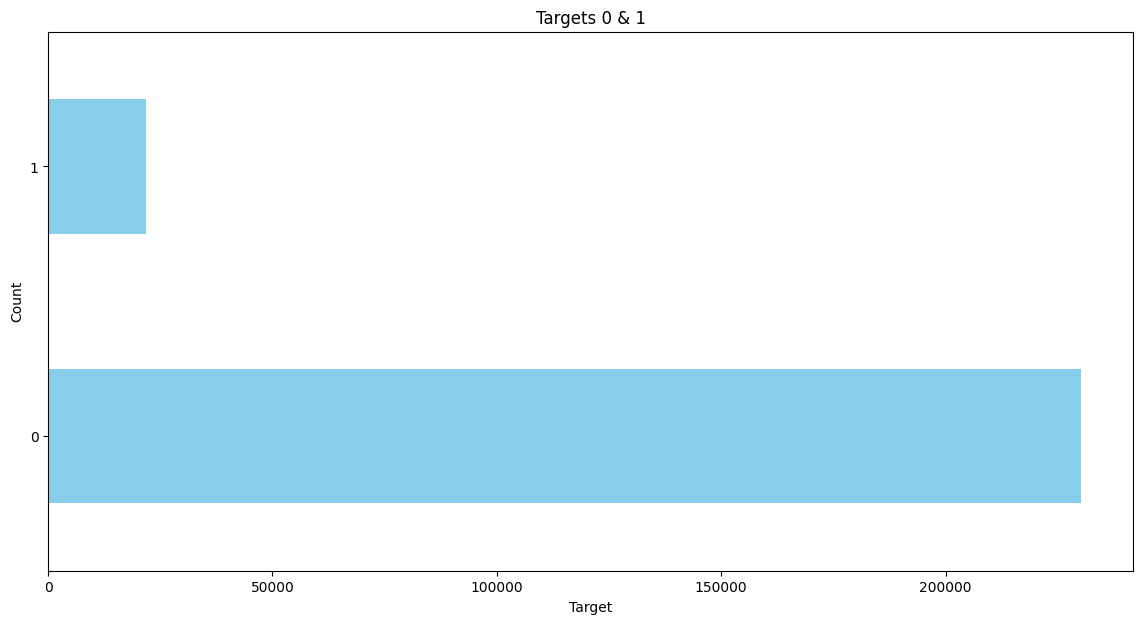

In [79]:
plt.figure(figsize=(14,7))
dfapp.TARGET.value_counts().plot.barh(color='skyblue')
plt.title('Targets 0 & 1')
plt.ylabel('Count')
plt.xlabel('Target')

In [80]:
# Checking the imbalance ratio for the target column 
target0=dfapp.loc[dfapp['TARGET']==0]
target1=dfapp.loc[dfapp['TARGET']==1]

round(len(target0)/len(target1),2)

10.55

In [ ]:
# UNIVARIATE ANALYSIS

In [ ]:
## Plotting a bar chart for those having no difficulties in re-paying the loan i.e. Target=0

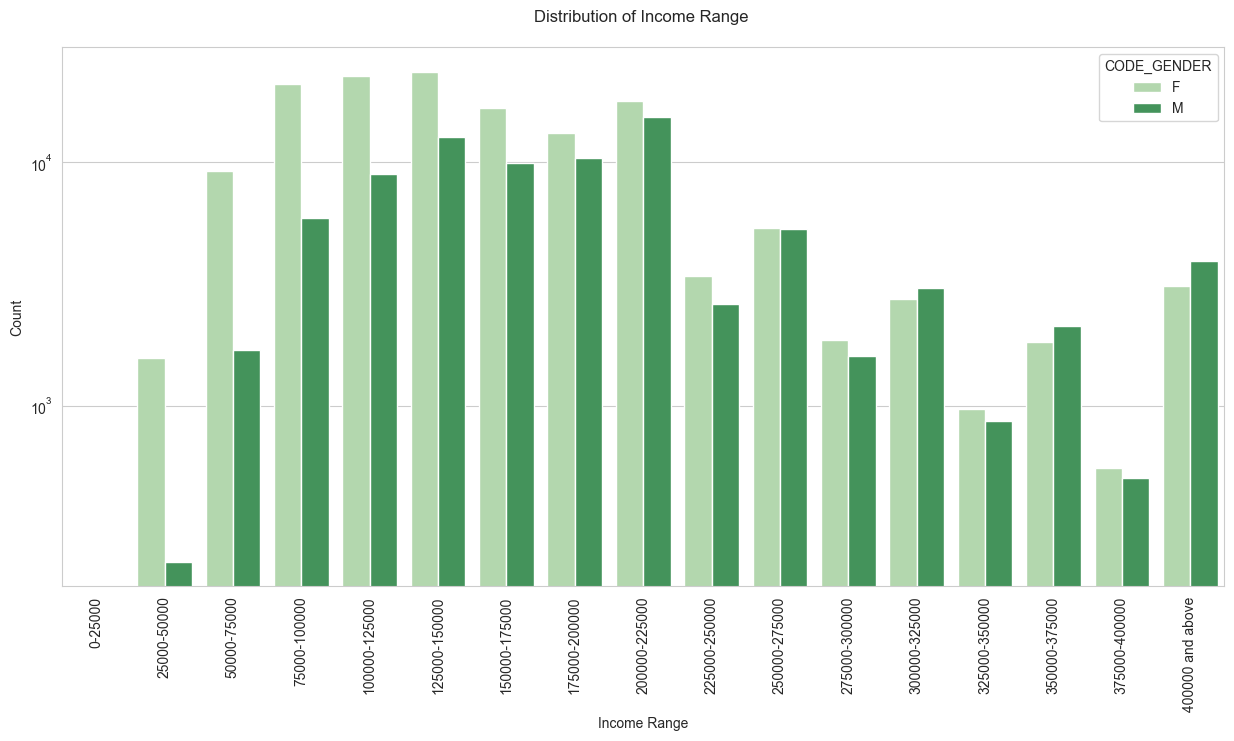

In [105]:
# Plotting for Income Range across various Gender.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target0, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Greens')

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.yscale('log')

plt.show()

Conclusions from Graph:

1. The income range of $125,000 to $150,000 has the highest number of credits.
2. There are very few credits in the $375,000 to $400,000 range.
3. Overall, females appear to have more credits than males.

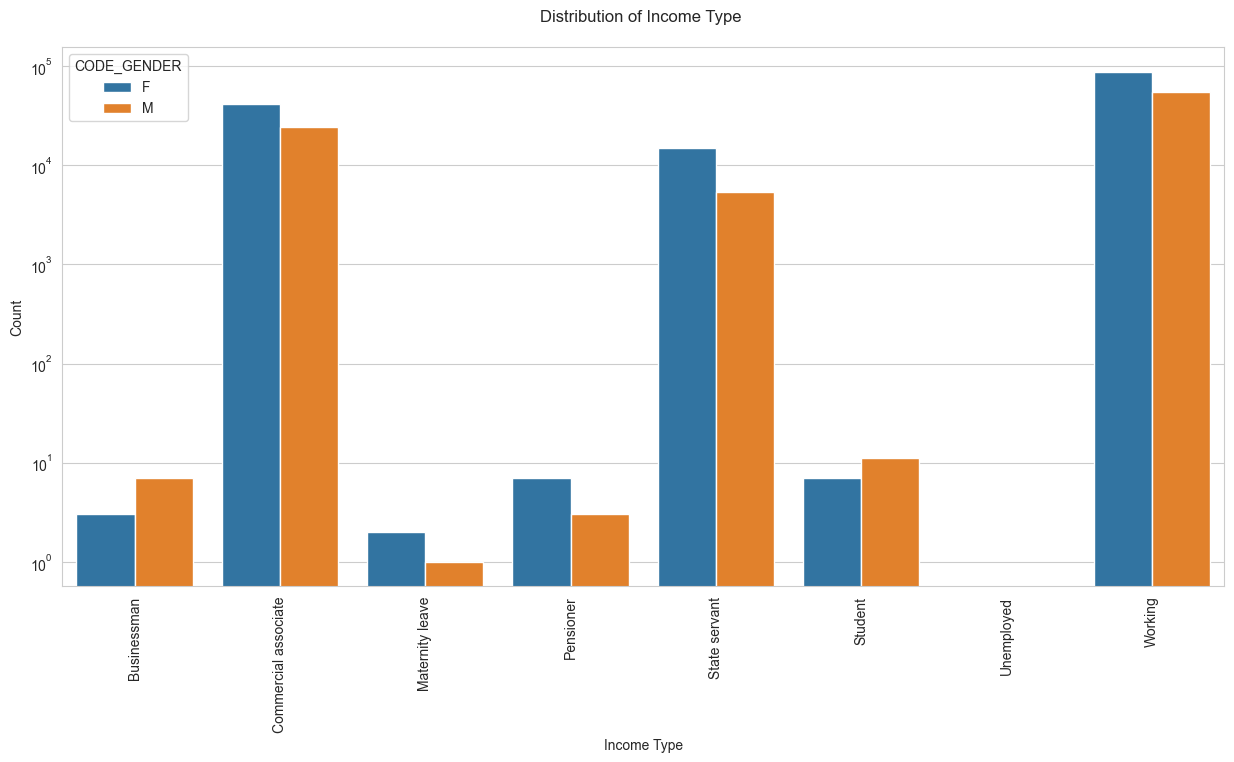

In [137]:
# Plotting for the various Income types across various Gender.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target0, x='NAME_INCOME_TYPE', hue='CODE_GENDER')

plt.xticks(rotation=90)
plt.title('Distribution of Income Type \n')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.yscale('log')

plt.show()

- Higher number of credits for "commercial associate" and "state servant" compared to "maternity leave."
- Females have more credits than males, especially in the "maternity leave" category.
- Public services exhibit higher employment rates for females.
- Growing presence of women in professional roles noted.
- Females slightly outnumber males in public services.
- Commercial or associate positions may be more welcoming to women than other fields.

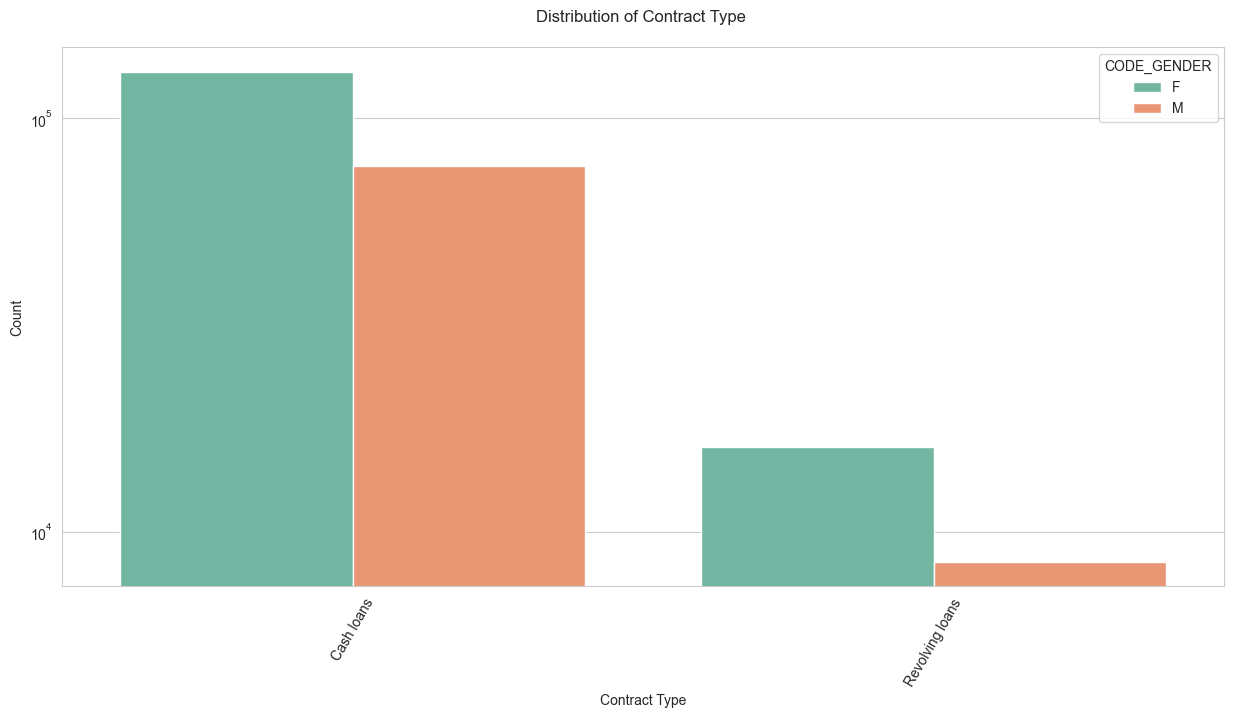

In [84]:
# Plotting for the Contract type across various Genders.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')

plt.xticks(rotation=60)
plt.title('Distribution of Contract Type \n')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.yscale('log')

plt.show()

1. The 'cash loans' contract type has more credits than 'revolving loans.' 
2. Additionally, females are leading in credit applications.

C:\Users\HP\AppData\Local\Temp\ipykernel_16532\1366590988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target1, y='ORGANIZATION_TYPE', order=target0['ORGANIZATION_TYPE'].value_counts().index, palette='Set2')


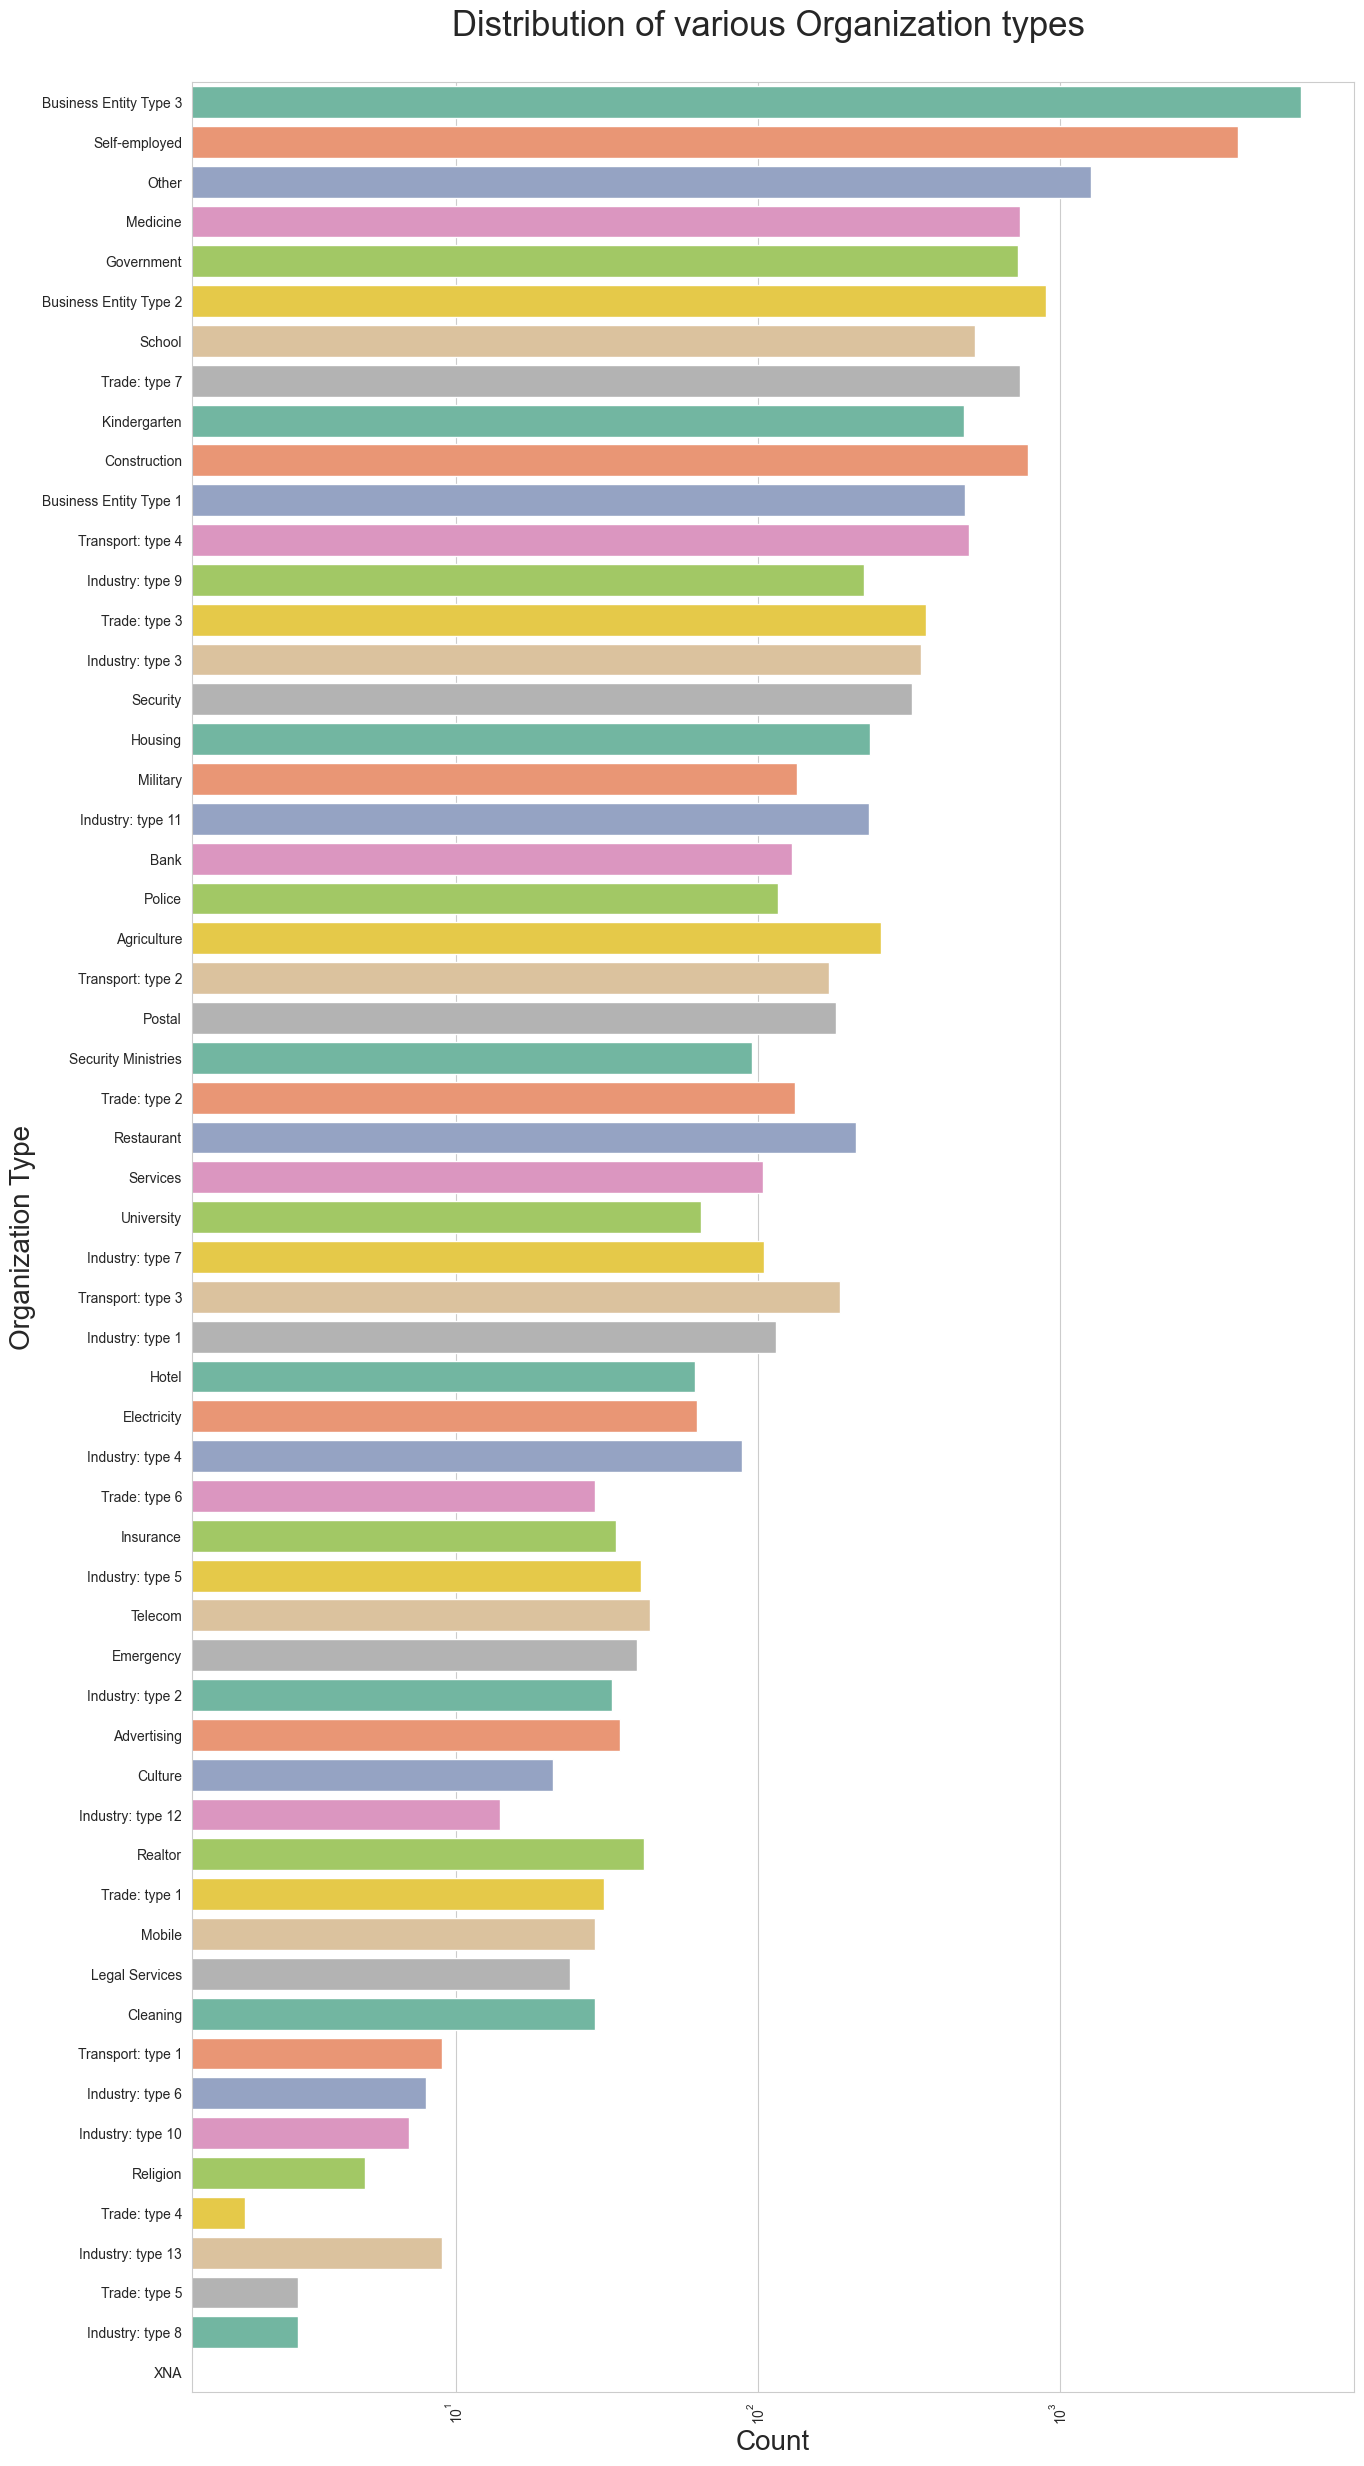

In [102]:
# Plotting for the various Organization Types

plt.figure(figsize=[15, 30])

sns.countplot(data=target1, y='ORGANIZATION_TYPE', order=target0['ORGANIZATION_TYPE'].value_counts().index, palette='Set2')
plt.title("Distribution of various Organization types \n", fontsize=25)
plt.xticks(rotation=90)
plt.xscale('log')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Organization Type', fontsize=20)

plt.show()

Conclusions from the graph: 1. Most credit applicants are from the organization types "Business entity Type 3," "Self-employed," "Other," "Medicine," and "Government."
2. Fewer clients come from industry types 8, 6, and 10, as well as from religion and trade types 5 and 4.
3. The distribution of organization types mirrors that of type 0.

<h4>Plotting a bar chart for those having difficulties in not re-paying the loan i.e the Target = 0 people</h4>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25000-50000'),
  Text(2, 0, '50000-75000'),
  Text(3, 0, '75000-100000'),
  Text(4, 0, '100000-125000'),
  Text(5, 0, '125000-150000'),
  Text(6, 0, '150000-175000'),
  Text(7, 0, '175000-200000'),
  Text(8, 0, '200000-225000'),
  Text(9, 0, '225000-250000'),
  Text(10, 0, '250000-275000'),
  Text(11, 0, '275000-300000'),
  Text(12, 0, '300000-325000'),
  Text(13, 0, '325000-350000'),
  Text(14, 0, '350000-375000'),
  Text(15, 0, '375000-400000'),
  Text(16, 0, '400000\xa0and\xa0above')])

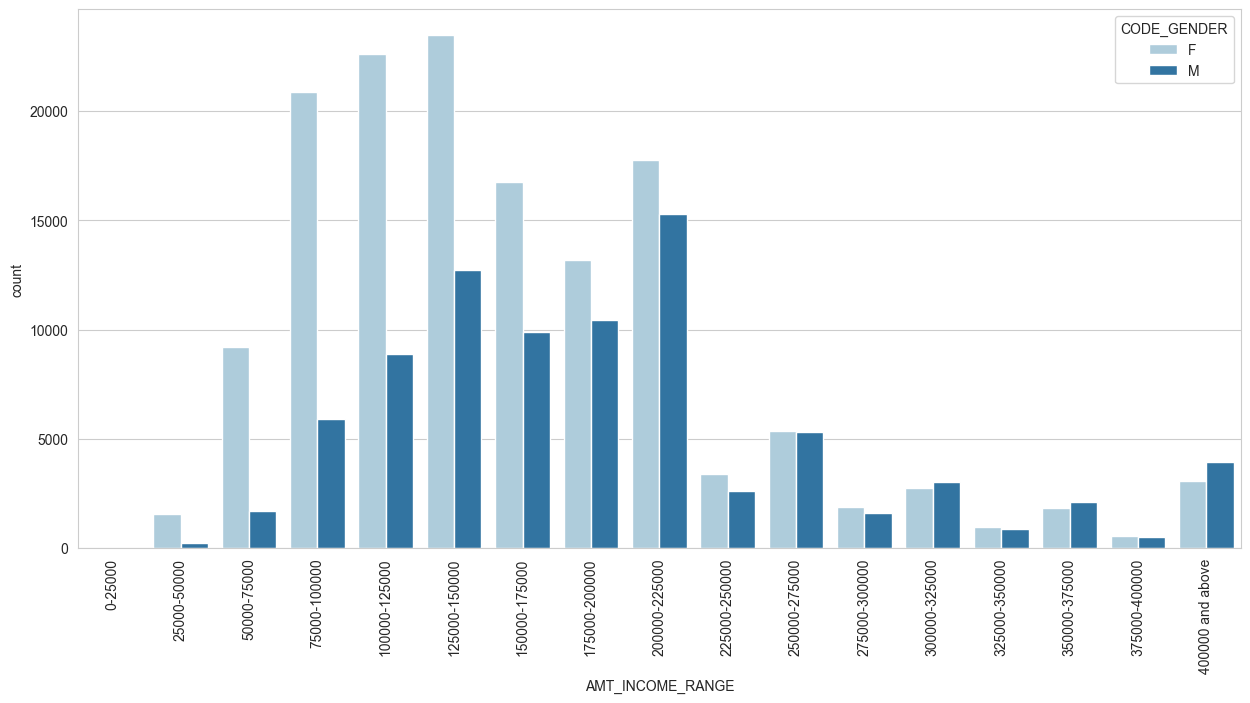

In [109]:
plt.figure(figsize=[15,7])
sns.countplot(hue='CODE_GENDER',x='AMT_INCOME_RANGE',data=target0,palette='Paired')
plt.xticks(rotation=90)

- The income range of $125,000 to $150,000 has the highest number of credits.
- The income range of $450,000 to $475,000 has very few credits.
- There appear to be more females than males in the $125,000 to $150,000 credit range.

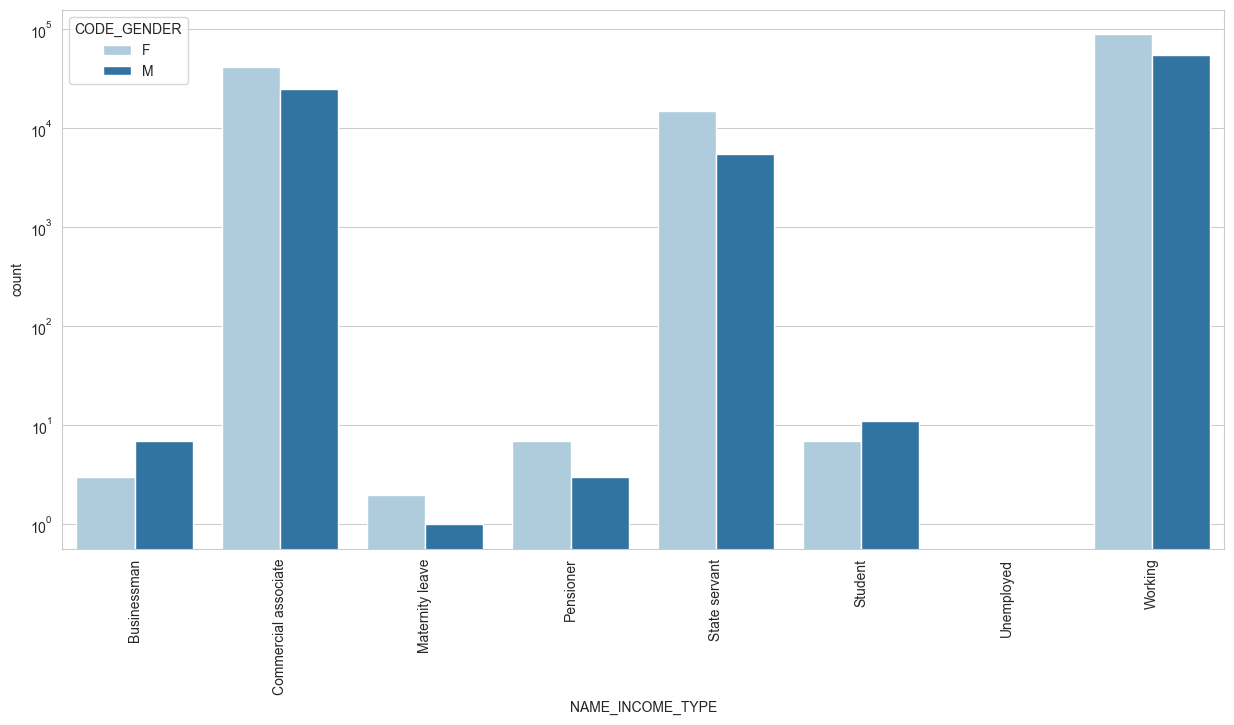

In [110]:
plt.figure(figsize=[15,7])
sns.countplot(hue='CODE_GENDER',x='NAME_INCOME_TYPE',data=target0,palette='Paired')
plt.xticks(rotation=90)
plt.yscale('log')

1. Working women appear to have more credit than others.
2. 'State Servant, Working' and 'Commercial Associate' roles have higher credit counts compared to others.
3. Women on maternity leave seem to have less credit than others.

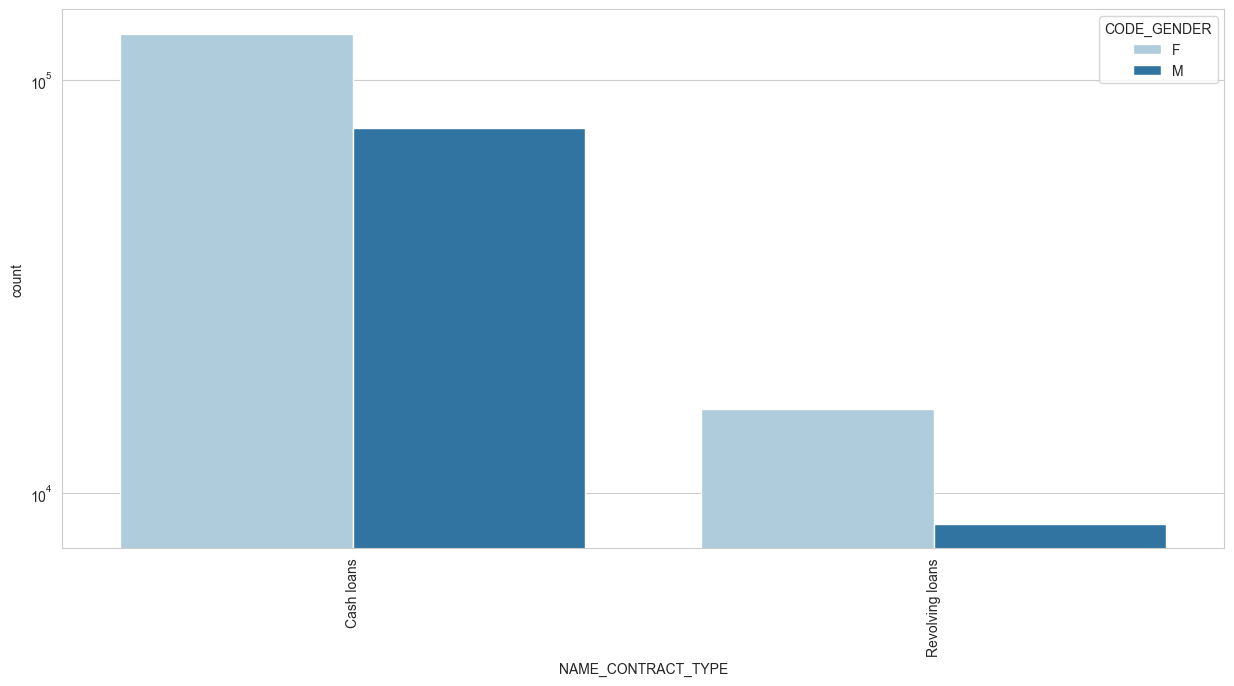

In [111]:
plt.figure(figsize=[15,7])
sns.countplot(hue='CODE_GENDER',x='NAME_CONTRACT_TYPE',data=target0,palette='Paired')
plt.xticks(rotation=90)
plt.yscale("log")

Cash loans appear to have more credits than revolving loan contracts. Additionally, women apply for credit more often.

C:\Users\HP\AppData\Local\Temp\ipykernel_16532\3402178875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target0, y='ORGANIZATION_TYPE', order=target0.ORGANIZATION_TYPE.value_counts().index, palette="Paired")


Text(0.5, 0, 'Count')

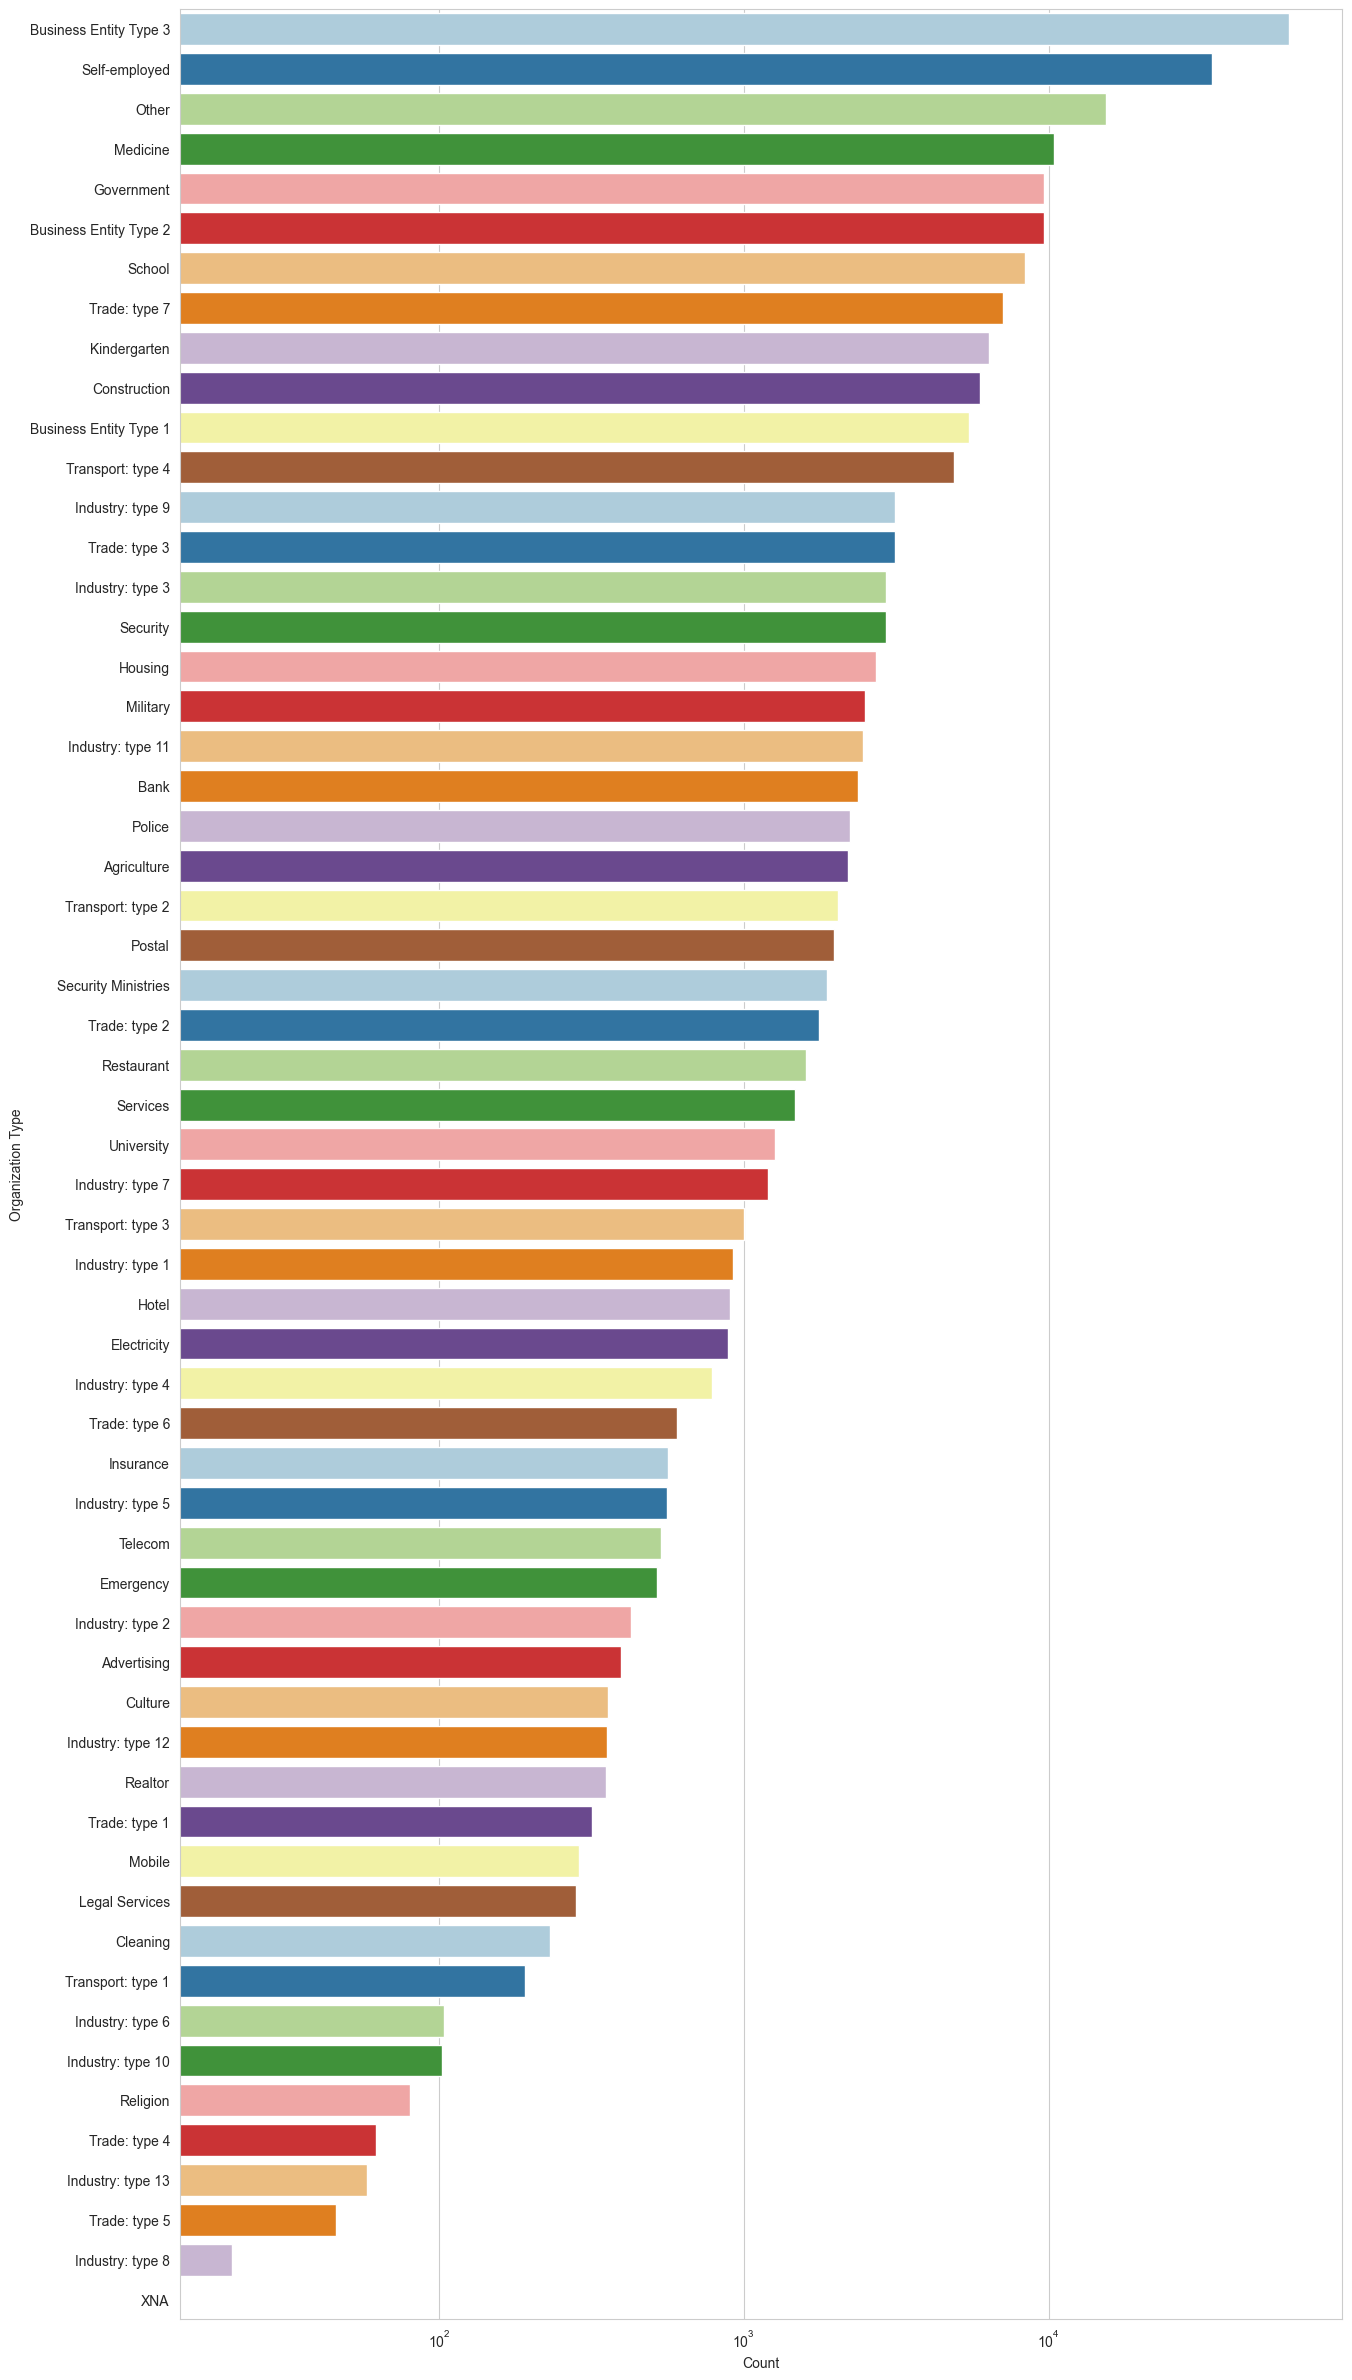

In [114]:
plt.figure(figsize=[15,30])
sns.countplot(data=target0, y='ORGANIZATION_TYPE', order=target0.ORGANIZATION_TYPE.value_counts().index, palette="Paired")
plt.xscale('log')
plt.ylabel('Organization Type')
plt.xlabel('Count')

- Most clients applying for credits belong to the following categories:
  - Business entity Type 3
  - Self-employed
  - Other
  - Medicine
  - Government

- Fewer clients represent the following categories:
  - Industry type 8
  - Industry type 6
  - Industry type 10
  - Religion
  - Trade types 4 and 5


<h4>Defining the Correlation and Calculating top 10 correlations for Target 1 and Target 0 </h4>

# Defining the Correlation

In [86]:
# Calculating correlation among the target0 clients
numr = target0.select_dtypes(include='number') 
target0_corr = numr.iloc[0:, 2:].corr()
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.009826   -0.018704   
AMT_INCOME_TOTAL                -0.009826          1.000000    0.326155   
AMT_CREDIT                      -0.018704          0.326155    1.000000   
AMT_ANNUITY                     -0.007612          0.400752    0.762103   
AMT_GOODS_PRICE                 -0.022293          0.333292    0.986471   
REGION_POPULATION_RELATIVE      -0.030352          0.169306    0.103876   
DAYS_BIRTH                       0.242462         -0.045543   -0.152659   
DAYS_EMPLOYED                    0.063036         -0.030102   -0.087500   
DAYS_REGISTRATION                0.162900          0.034508   -0.015180   
DAYS_ID_PUBLISH                 -0.117746         -0.026462   -0.034914   
CNT_FAM_MEMBERS                  0.893276         -0.003133    0.036760   
HOUR_APPR_PROCESS_START         -0.033031          0.055934    0.040390   
REG_REGION_NOT_LIVE_REGION      -0.023033          0.064868    0.020979   
REG_REGION_NOT_WORK_REGION      -0.016798          0.129765    0.050597   
LIVE_REGION_NOT_WORK_REGION     -0.006946          0.121288    0.052028   
REG_CITY_NOT_LIVE_CITY          -0.001566         -0.004264   -0.037527   
REG_CITY_NOT_WORK_CITY           0.010369         -0.020260   -0.038517   
LIVE_CITY_NOT_WORK_CITY          0.018414         -0.011238   -0.014834   
EXT_SOURCE_2                    -0.026082          0.137597    0.135790   
EXT_SOURCE_3                    -0.015157         -0.052724    0.056919   
OBS_30_CNT_SOCIAL_CIRCLE         0.019474         -0.031292   -0.002932   
DEF_30_CNT_SOCIAL_CIRCLE         0.003481         -0.028196   -0.021726   
OBS_60_CNT_SOCIAL_CIRCLE         0.019148         -0.031106   -0.002902   
DEF_60_CNT_SOCIAL_CIRCLE         0.002439         -0.027641   -0.023820   
DAYS_LAST_PHONE_CHANGE          -0.002415         -0.034050   -0.069840   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001019          0.002664   -0.002694   
AMT_REQ_CREDIT_BUREAU_DAY        0.000660          0.009039    0.006213   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000047          0.009068    0.000279   
AMT_REQ_CREDIT_BUREAU_MON       -0.017476          0.054560    0.054174   
AMT_REQ_CREDIT_BUREAU_QRT       -0.000453          0.016234    0.022967   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.020784          0.038459   -0.027913   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   -0.007612        -0.022293   
AMT_INCOME_TOTAL                0.400752         0.333292   
AMT_CREDIT                      0.762103         0.986471   
AMT_ANNUITY                     1.000000         0.766655   
AMT_GOODS_PRICE                 0.766655         1.000000   
REGION_POPULATION_RELATIVE      0.122206         0.107024   
DAYS_BIRTH                     -0.091571        -0.146854   
DAYS_EMPLOYED                  -0.052470        -0.088614   
DAYS_REGISTRATION               0.009814        -0.011843   
DAYS_ID_PUBLISH                -0.025990        -0.036687   
CNT_FAM_MEMBERS                 0.041231         0.034889   
HOUR_APPR_PROCESS_START         0.034038         0.049934   
REG_REGION_NOT_LIVE_REGION      0.039753         0.023545   
REG_REGION_NOT_WORK_REGION      0.076045         0.052040   
LIVE_REGION_NOT_WORK_REGION     0.071623         0.052311   
REG_CITY_NOT_LIVE_CITY         -0.018912        -0.036943   
REG_CITY_NOT_WORK_CITY         -0.028971        -0.039250   
LIVE_CITY_NOT_WORK_CITY        -0.014268        -0.015814   
EXT_SOURCE_2                    0.126756         0.142193   
EXT_SOURCE_3                    0.046820         0.059234   
OBS_30_CNT_SOCIAL_CIRCLE       -0.015589        -0.003335   
DEF_30_CNT_SOCIAL_CIRCLE       -0.022804        -0.023078   
OBS_60_CNT_SOCIAL_CIRCLE       -0.015408        -0.003347   
DEF_60_CNT_SOCIAL_CIRCLE       -0.023704        -0.024749   
DAYS_LAST_PHONE_CHANGE         -0.060872        -0.071812   
AMT_REQ_CREDIT_BUREAU_HOUR      0.003876  

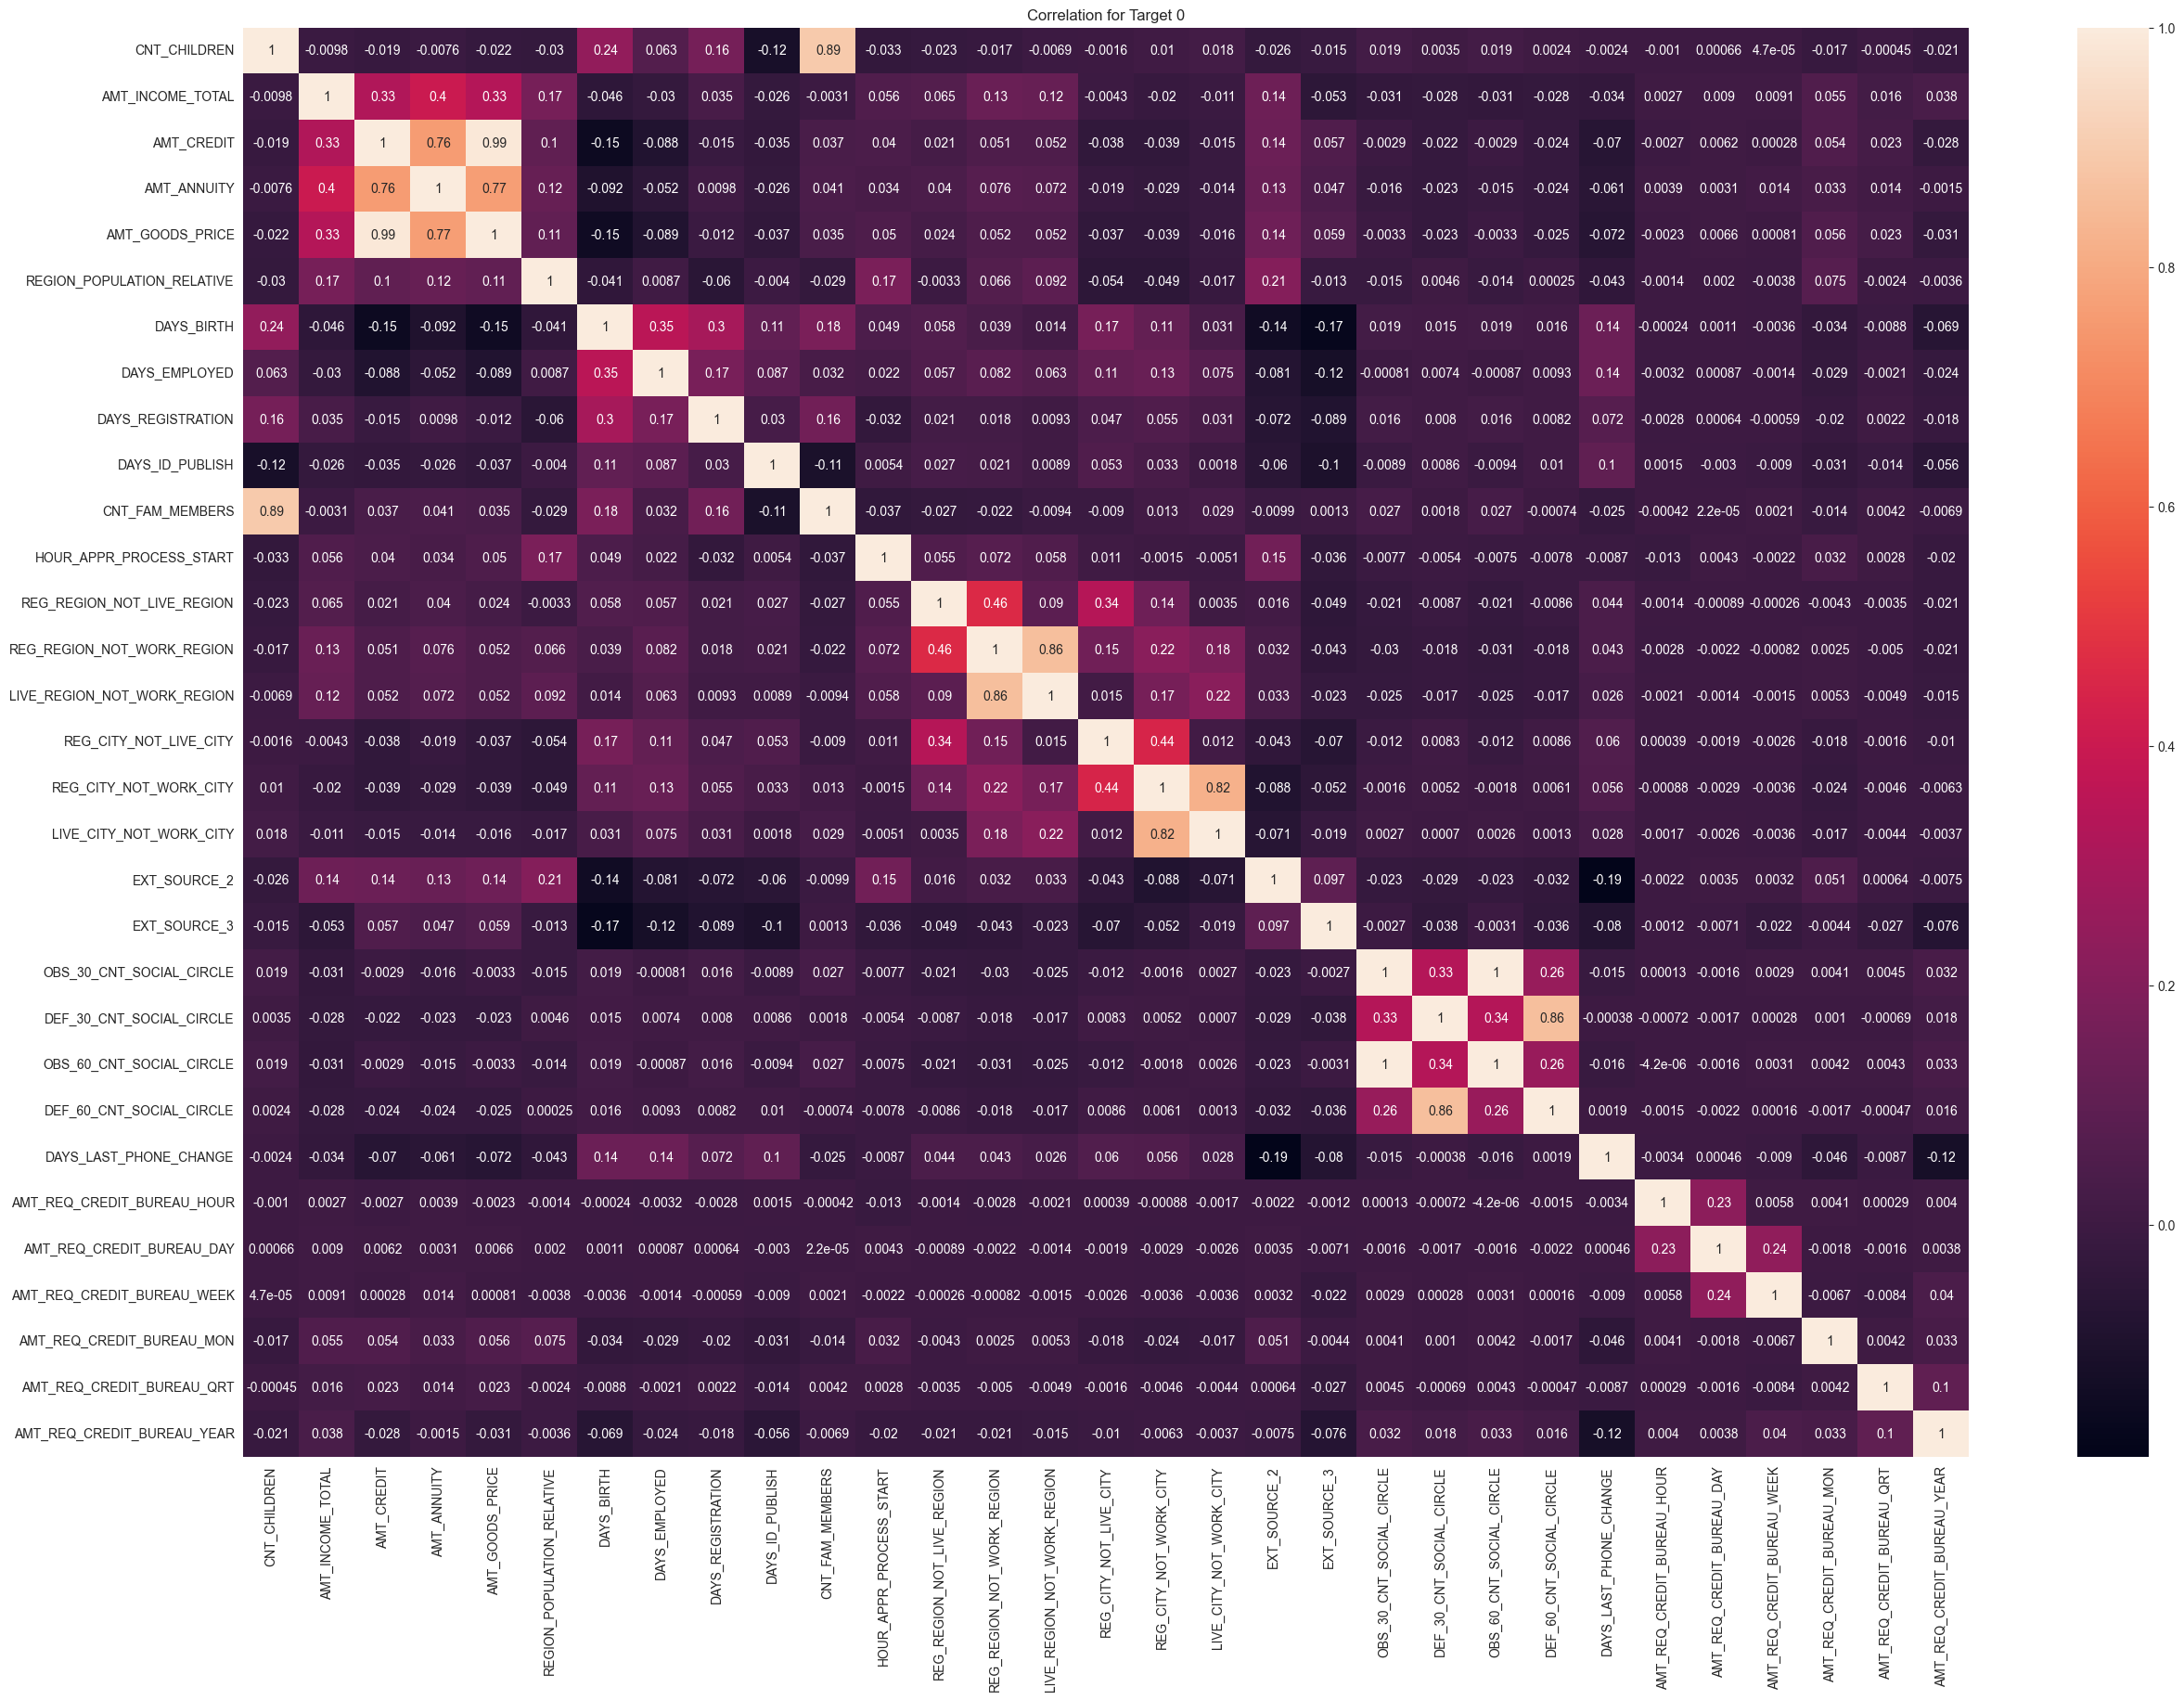

In [87]:
# Plot for target 0
plt.figure(figsize=[30,20])
sns.heatmap(target0_corr,annot=True)
plt.title('Correlation for Target 0')
plt.show()

In [89]:
# Calculating correlation among the target1 clients
numr = target1.select_dtypes(include='number') 
target1_corr = numr.iloc[0:, 2:].corr()
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                 0.001872          1.000000    0.036484   
AMT_CREDIT                      -0.002074          0.036484    1.000000   
AMT_ANNUITY                      0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                 -0.007710          0.036105    0.982464   
REGION_POPULATION_RELATIVE      -0.032019          0.008476    0.069220   
DAYS_BIRTH                       0.176563         -0.007822   -0.189512   
DAYS_EMPLOYED                    0.032627         -0.000039   -0.106003   
DAYS_REGISTRATION                0.126411         -0.003959   -0.033250   
DAYS_ID_PUBLISH                 -0.089861         -0.008858   -0.062405   
CNT_FAM_MEMBERS                  0.893829          0.003692    0.045420   
HOUR_APPR_PROCESS_START         -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION      -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION      -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION     -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY          -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY          -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY          0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                    -0.010425          0.006125    0.126118   
EXT_SOURCE_3                    -0.000029         -0.013841    0.086877   
OBS_30_CNT_SOCIAL_CIRCLE         0.028804         -0.005845    0.016521   
DEF_30_CNT_SOCIAL_CIRCLE         0.003023         -0.005837   -0.031438   
OBS_60_CNT_SOCIAL_CIRCLE         0.028046         -0.005744    0.017002   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003162         -0.005272   -0.034792   
DAYS_LAST_PHONE_CHANGE           0.011577         -0.001184   -0.115908   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001269          0.000925   -0.005051   
AMT_REQ_CREDIT_BUREAU_DAY       -0.008695         -0.000071   -0.000943   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.006195          0.000885    0.013307   
AMT_REQ_CREDIT_BUREAU_MON       -0.015163          0.005141    0.061456   
AMT_REQ_CREDIT_BUREAU_QRT       -0.011841          0.000607   -0.003275   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.015698          0.005657   -0.008383   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.015653        -0.007710   
AMT_INCOME_TOTAL                0.043358         0.036105   
AMT_CREDIT                      0.748708         0.982464   
AMT_ANNUITY                     1.000000         0.748940   
AMT_GOODS_PRICE                 0.748940         1.000000   
REGION_POPULATION_RELATIVE      0.074406         0.076286   
DAYS_BIRTH                     -0.090497        -0.185452   
DAYS_EMPLOYED                  -0.049032        -0.111886   
DAYS_REGISTRATION               0.014302        -0.032044   
DAYS_ID_PUBLISH                -0.044289        -0.064692   
CNT_FAM_MEMBERS                 0.054884         0.042143   
HOUR_APPR_PROCESS_START         0.022524         0.042254   
REG_REGION_NOT_LIVE_REGION      0.033311         0.023567   
REG_REGION_NOT_WORK_REGION      0.063242         0.039452   
LIVE_REGION_NOT_WORK_REGION     0.061609         0.038509   
REG_CITY_NOT_LIVE_CITY         -0.013834        -0.035596   
REG_CITY_NOT_WORK_CITY         -0.019728        -0.041532   
LIVE_CITY_NOT_WORK_CITY        -0.006806        -0.017118   
EXT_SOURCE_2                    0.119685         0.136840   
EXT_SOURCE_3                    0.052896         0.087324   
OBS_30_CNT_SOCIAL_CIRCLE        0.000881         0.017259   
DEF_30_CNT_SOCIAL_CIRCLE       -0.024091        -0.026744   
OBS_60_CNT_SOCIAL_CIRCLE        0.002111         0.017822   
DEF_60_CNT_SOCIAL_CIRCLE       -0.027431        -0.029302   
DAYS_LAST_PHONE_CHANGE         -0.083159        -0.123204   
AMT_REQ_CREDIT_BUREAU_HOUR      0.010425  

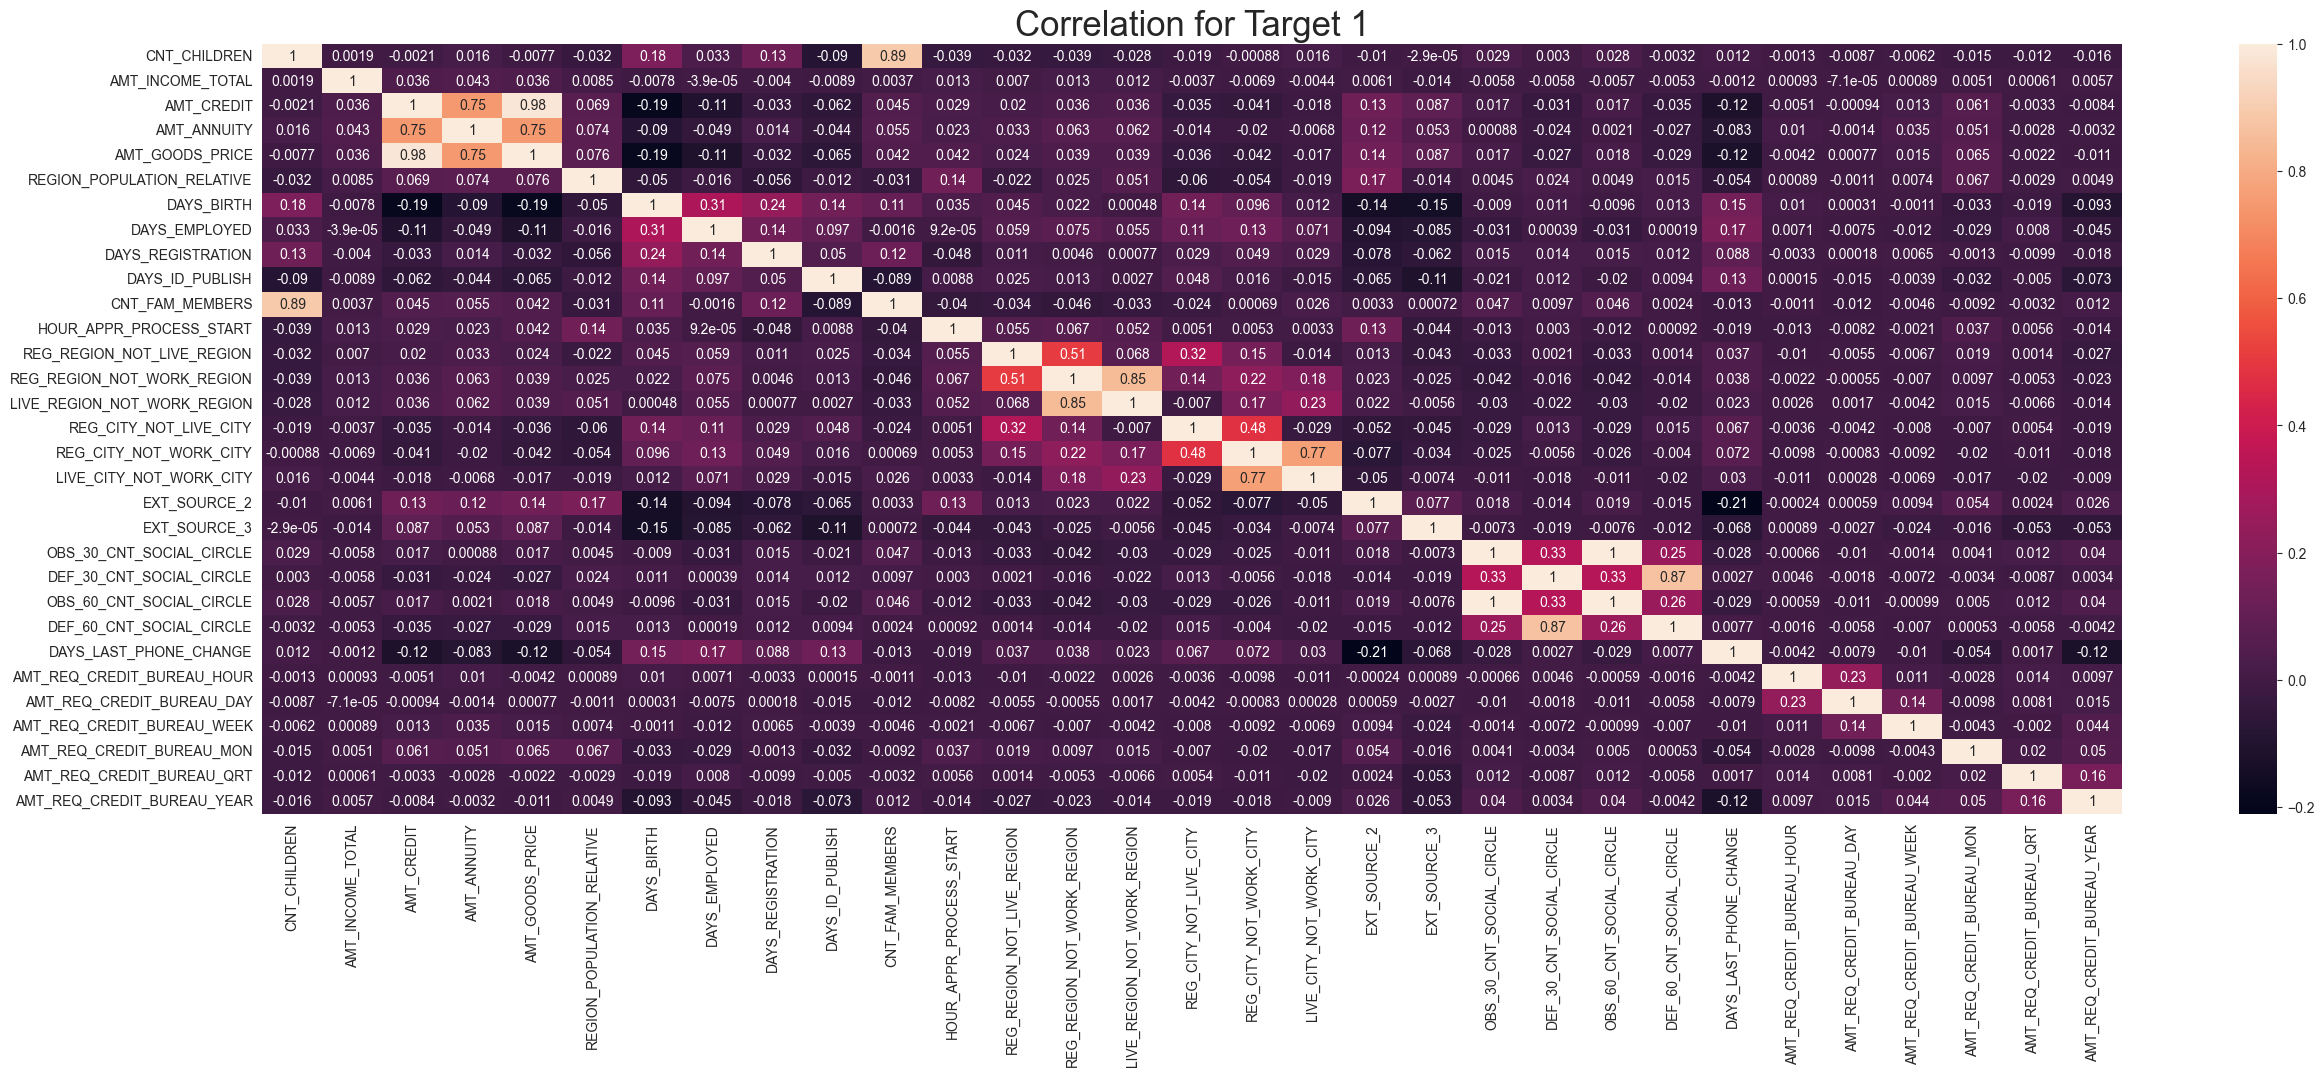

In [90]:
# Plot for target 1
plt.figure(figsize=[30,10])
sns.heatmap(target1_corr,annot=True)
plt.title('Correlation for Target 1',fontsize=25)
plt.show()

In [91]:
# Converting the negative values to positive values and sort the values
corr_0 = target0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0.tail(10)

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860421
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861492
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861492
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893276
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893276
AMT_CREDIT                   AMT_GOODS_PRICE                0.986471
AMT_GOODS_PRICE              AMT_CREDIT                     0.986471
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998492
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998492
dtype: float64

In [92]:
# Converting the negative values to positive values and sort the values
corr_1 = target1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1= corr_1[corr_1 != 1.0]
corr_1.tail(10)

LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846872
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867983
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867983
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
AMT_GOODS_PRICE              AMT_CREDIT                     0.982464
AMT_CREDIT                   AMT_GOODS_PRICE                0.982464
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998289
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998289
dtype: float64

Bivariate Analysis of the Numerical columns

In [ ]:
# Scatterplot for correlations and trends in dataset

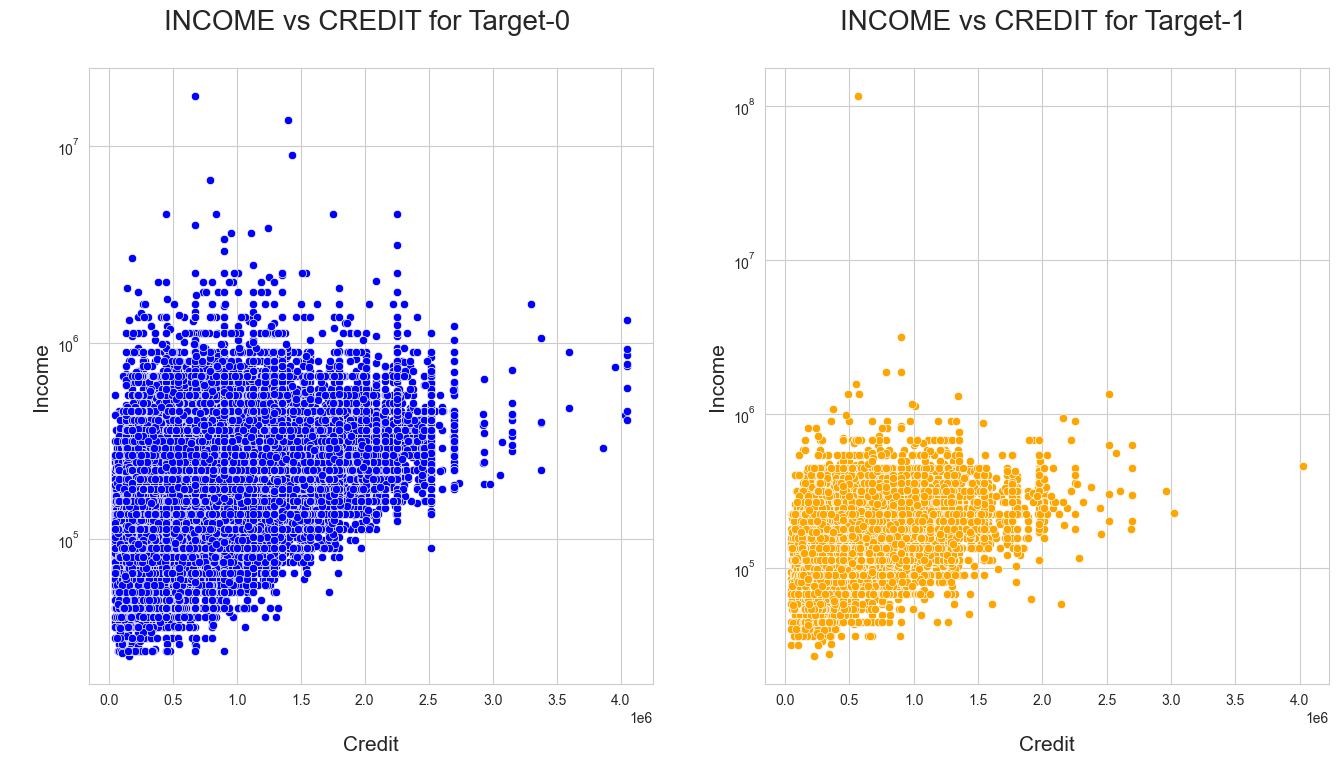

In [138]:

plt.figure(figsize=[16,8])

# Scatterplot for Target-0
plt.subplot(1,2,1)
sns.scatterplot(x=target0.AMT_CREDIT, y=target0.AMT_INCOME_TOTAL, color='blue') 
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

# Scatterplot for Target-1 
plt.subplot(1,2,2)
sns.scatterplot(x=target1.AMT_CREDIT, y=target1.AMT_INCOME_TOTAL, color='orange') 
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.show()


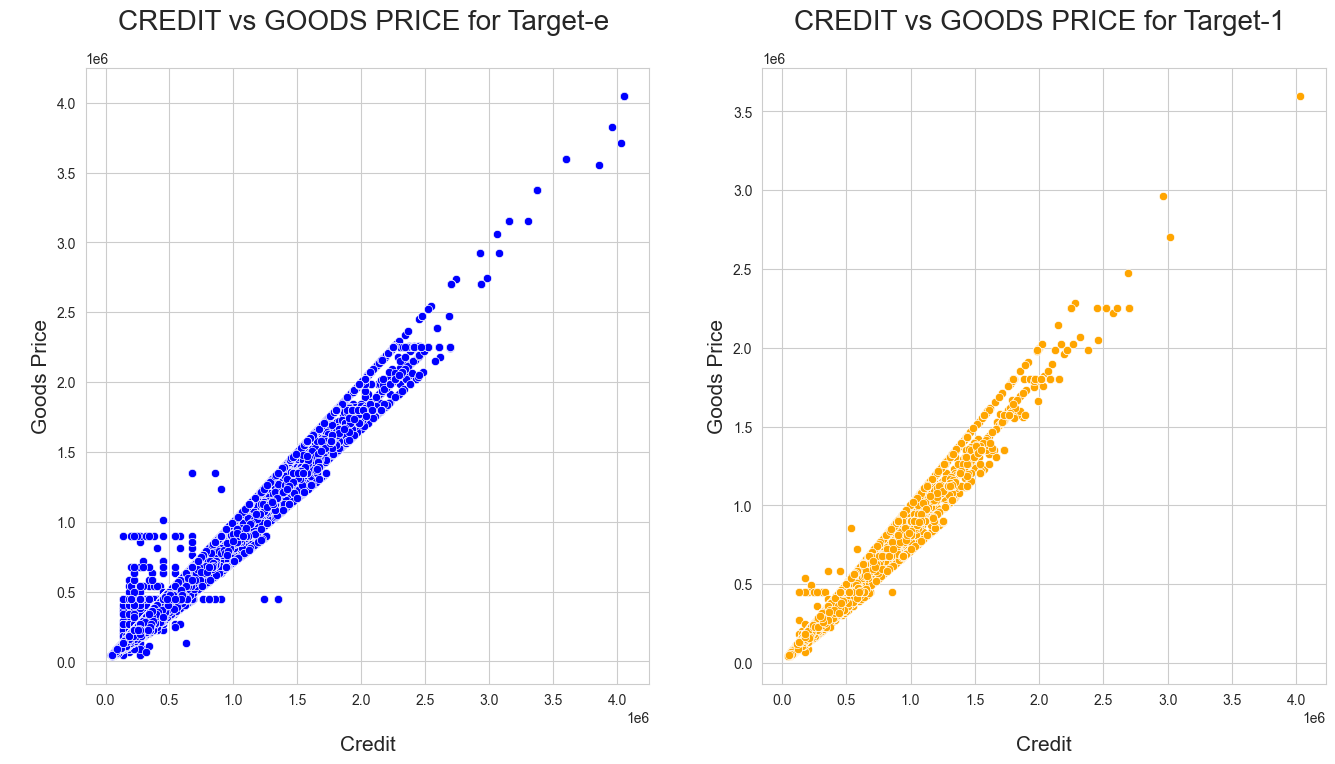

In [139]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.

plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target0,color='blue')
plt.title('CREDIT vs GOODS PRICE for Target-e \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target1,color='orange')
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.show()

In [ ]:
# Finding Outliers

In [ ]:
## **Univariate Analysis for Target**

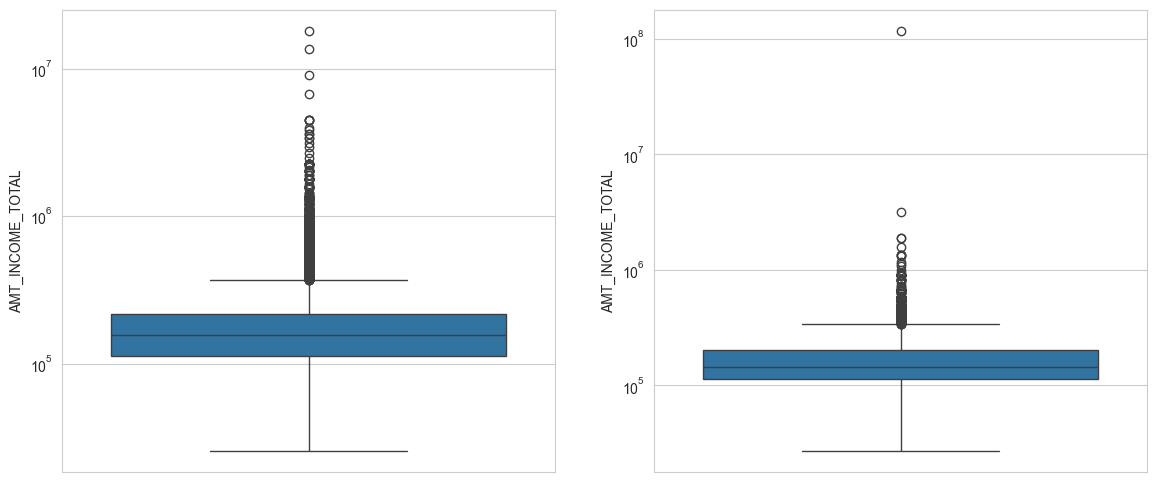

In [117]:
# Distribution of Income Amount,

plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
sns.boxplot(y='AMT_INCOME_TOTAL',data=target0)
plt.yscale('log')


plt.subplot(1,2,2)
sns.boxplot(y='AMT_INCOME_TOTAL',data=target1)
plt.yscale('log')


plt.show()

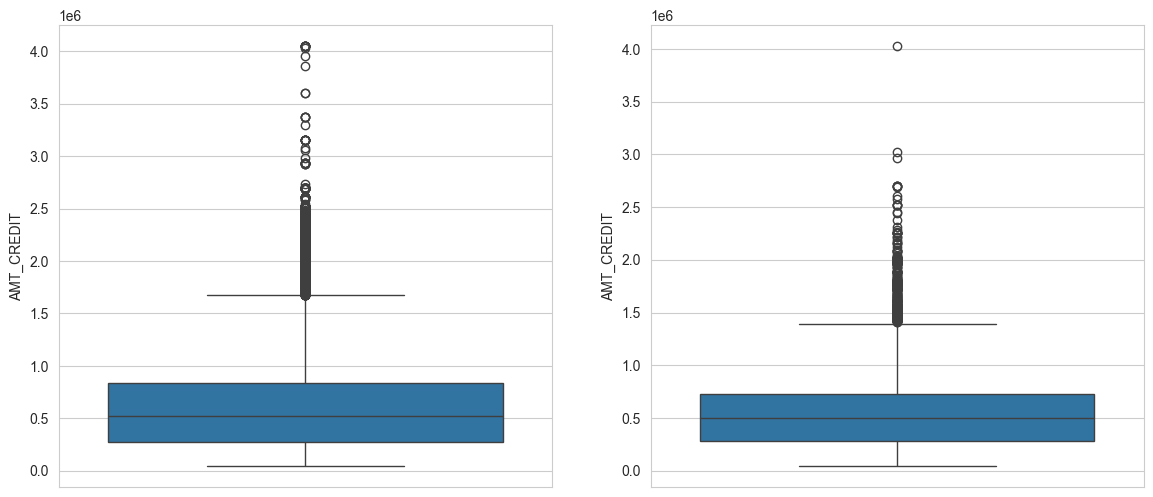

In [118]:
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
sns.boxplot(y='AMT_CREDIT',data=target0)

plt.subplot(1,2,2)
sns.boxplot(y='AMT_CREDIT',data=target1)


plt.show()

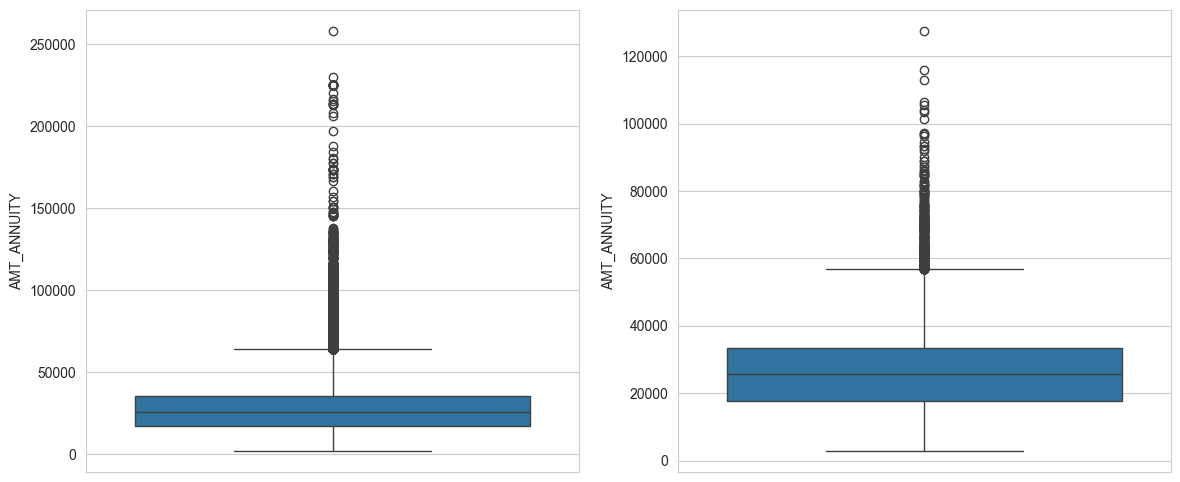

In [121]:
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
sns.boxplot(y='AMT_ANNUITY',data=target0)

plt.subplot(1,2,2)
sns.boxplot(y='AMT_ANNUITY',data=target1)


plt.show()

Multivariate Analysis
Box plot for Target 0 Credit Amount

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

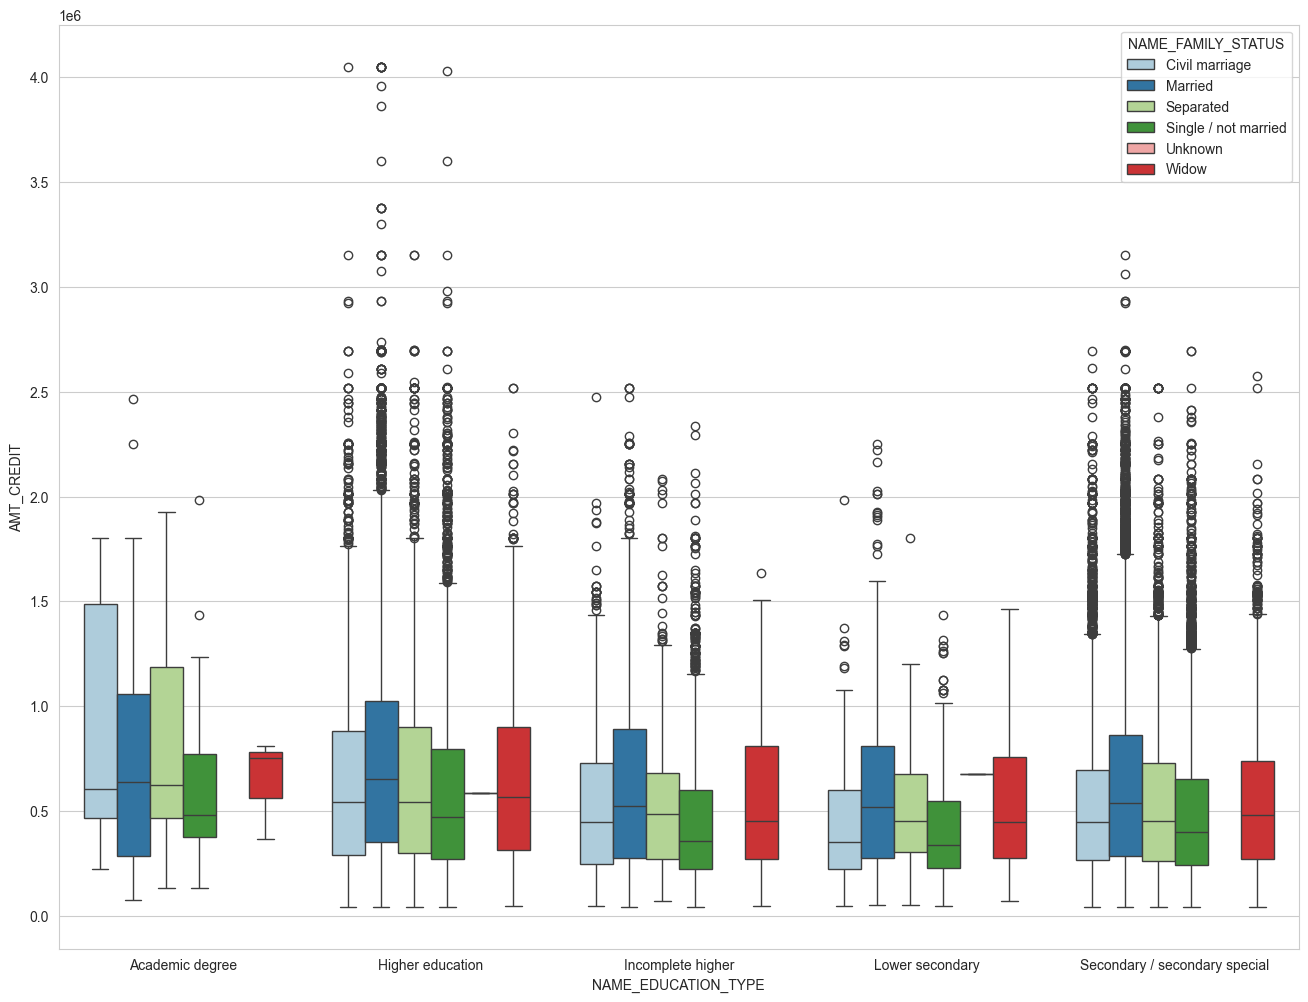

In [123]:
plt.figure(figsize=[16,12])
sns.boxplot(data=target0 , x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue = 'NAME_FAMILY_STATUS',orient='v',palette='Paired')

The box plot shows that people with the family statuses of 'civil marriage,' 'marriage,' and 'separated' who have academic degrees tend to have higher credit scores compared to others. Additionally, those with higher education in the 'married,' 'single,' and 'civil marriage' categories have more outliers in their credit scores. 

For academic degrees, 'civil marriage' has the highest credit scores in the top 25%.

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

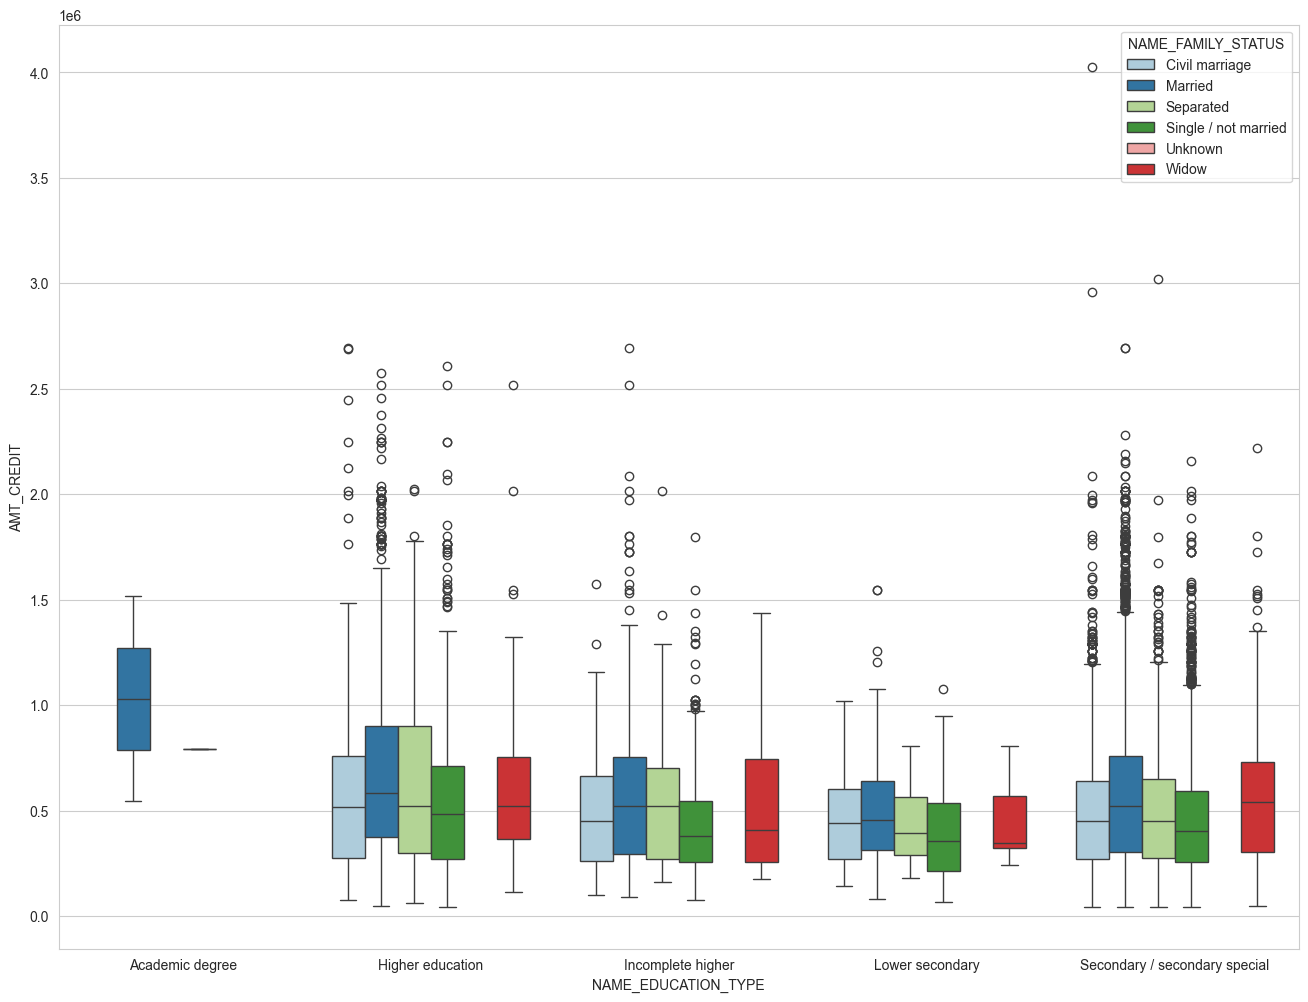

In [124]:
plt.figure(figsize=[16,12])
sns.boxplot(data=target1 , x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue = 'NAME_FAMILY_STATUS',orient='v',palette='Paired')

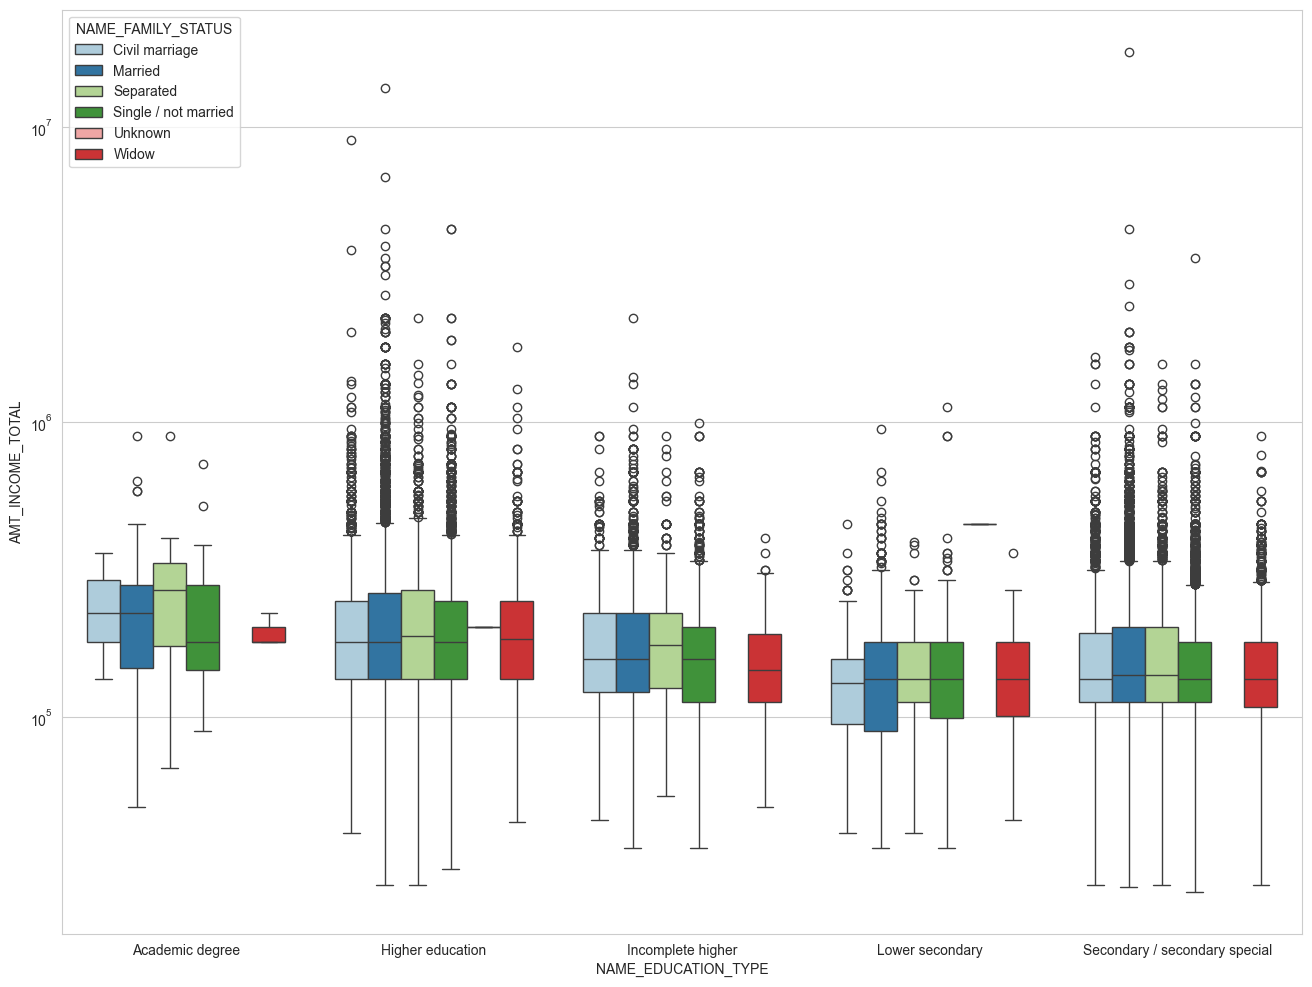

In [125]:
plt.figure(figsize=[16,12])
sns.boxplot(data=target0 , x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue = 'NAME_FAMILY_STATUS',orient='v',palette='Paired')
plt.yscale('log')

The boxplot for "Higher education" shows that income amounts are generally consistent across family statuses, though it contains several outliers. In contrast, the Academic degree category has fewer outliers, with generally higher income levels than those in Higher education. Moreover, the Lower secondary civil marriage family status has the lowest income among the groups.

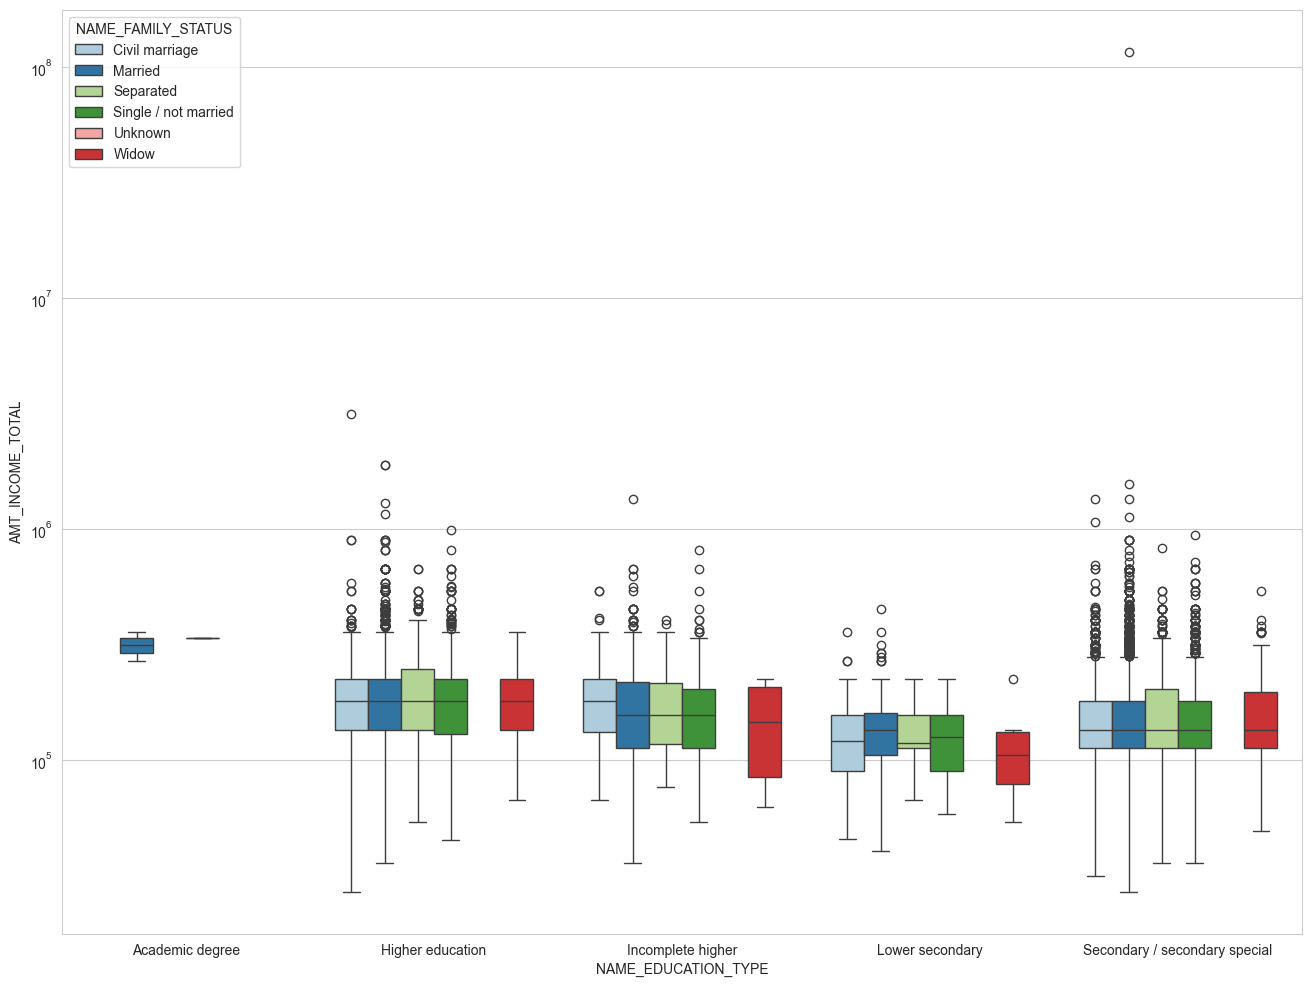

In [126]:
plt.figure(figsize=[16,12])
sns.boxplot(data=target1 , x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue = 'NAME_FAMILY_STATUS',orient='v',palette='Paired')
plt.yscale('log')

The box plot indicates that family statuses of 'civil marriage', 'marriage', and 'separated' have a higher number of credits in terms of academic degree education. Most outliers are found in the 'Higher education' and 'Secondary' types. Among academic degrees, civil marriage has the most credits in the third quartile.

<h2>Merging the two datasets</h2>

In [127]:
loan_merg = pd.merge(left = dfapp , right = dfprev , how = 'inner' , on = 'SK_ID_CURR' , suffixes=('_x', '_y'))

In [128]:
loan_merg.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0           90000.0      180000.0       9000.0   
1               Y             0          292500.0      665892.0      24592.5   
2               N             1          360000.0      733315.5      39069.0   
3               Y             0          180000.0      540000.0      27000.0   
4               Y             0          180000.0      540000.0      27000.0   

   ...  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0  ...                 XAP              New                 XNA   
1  ...                  HC         Repeater                 XNA   
2  ...                 XAP        Refreshed                 XNA   
3  ...                 XAP              New                 XNA   
4  ...               LIMIT         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE                CHANNEL_TYPE  \
0           Cash           walk-in     Credit and cash offices   
1           Cash           walk-in     Credit and cash offices   
2           Cash           walk-in  Channel of corporate sales   
3           Cash           walk-in     Credit and cash offices   
4           Cash           walk-in     Credit and cash offices   

   SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  NAME_YIELD_GROUP  \
0                -1                   XNA              high   
1                -1                   XNA        low_action   
2                -1                   XNA        low_normal   
3                -1                   XNA        low_normal   
4                -1                   XNA        low_normal   

   PRODUCT_COMBINATION  
0    Cash Street: high  
1     Cash Street: low  
2     Cash Street: low  
3     Cash Street: low  
4     Cash Street: low  

[5 rows x 69 columns]

In [129]:
loan_merg.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT


<h4>Removing unwanted columns for the ezz of analysis</h4>

In [130]:
loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [131]:
# Removing the unwanted columns from the dataset for the ease of analysis

loan_merg.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

<h2>Performing the Univariate analysis</h2>

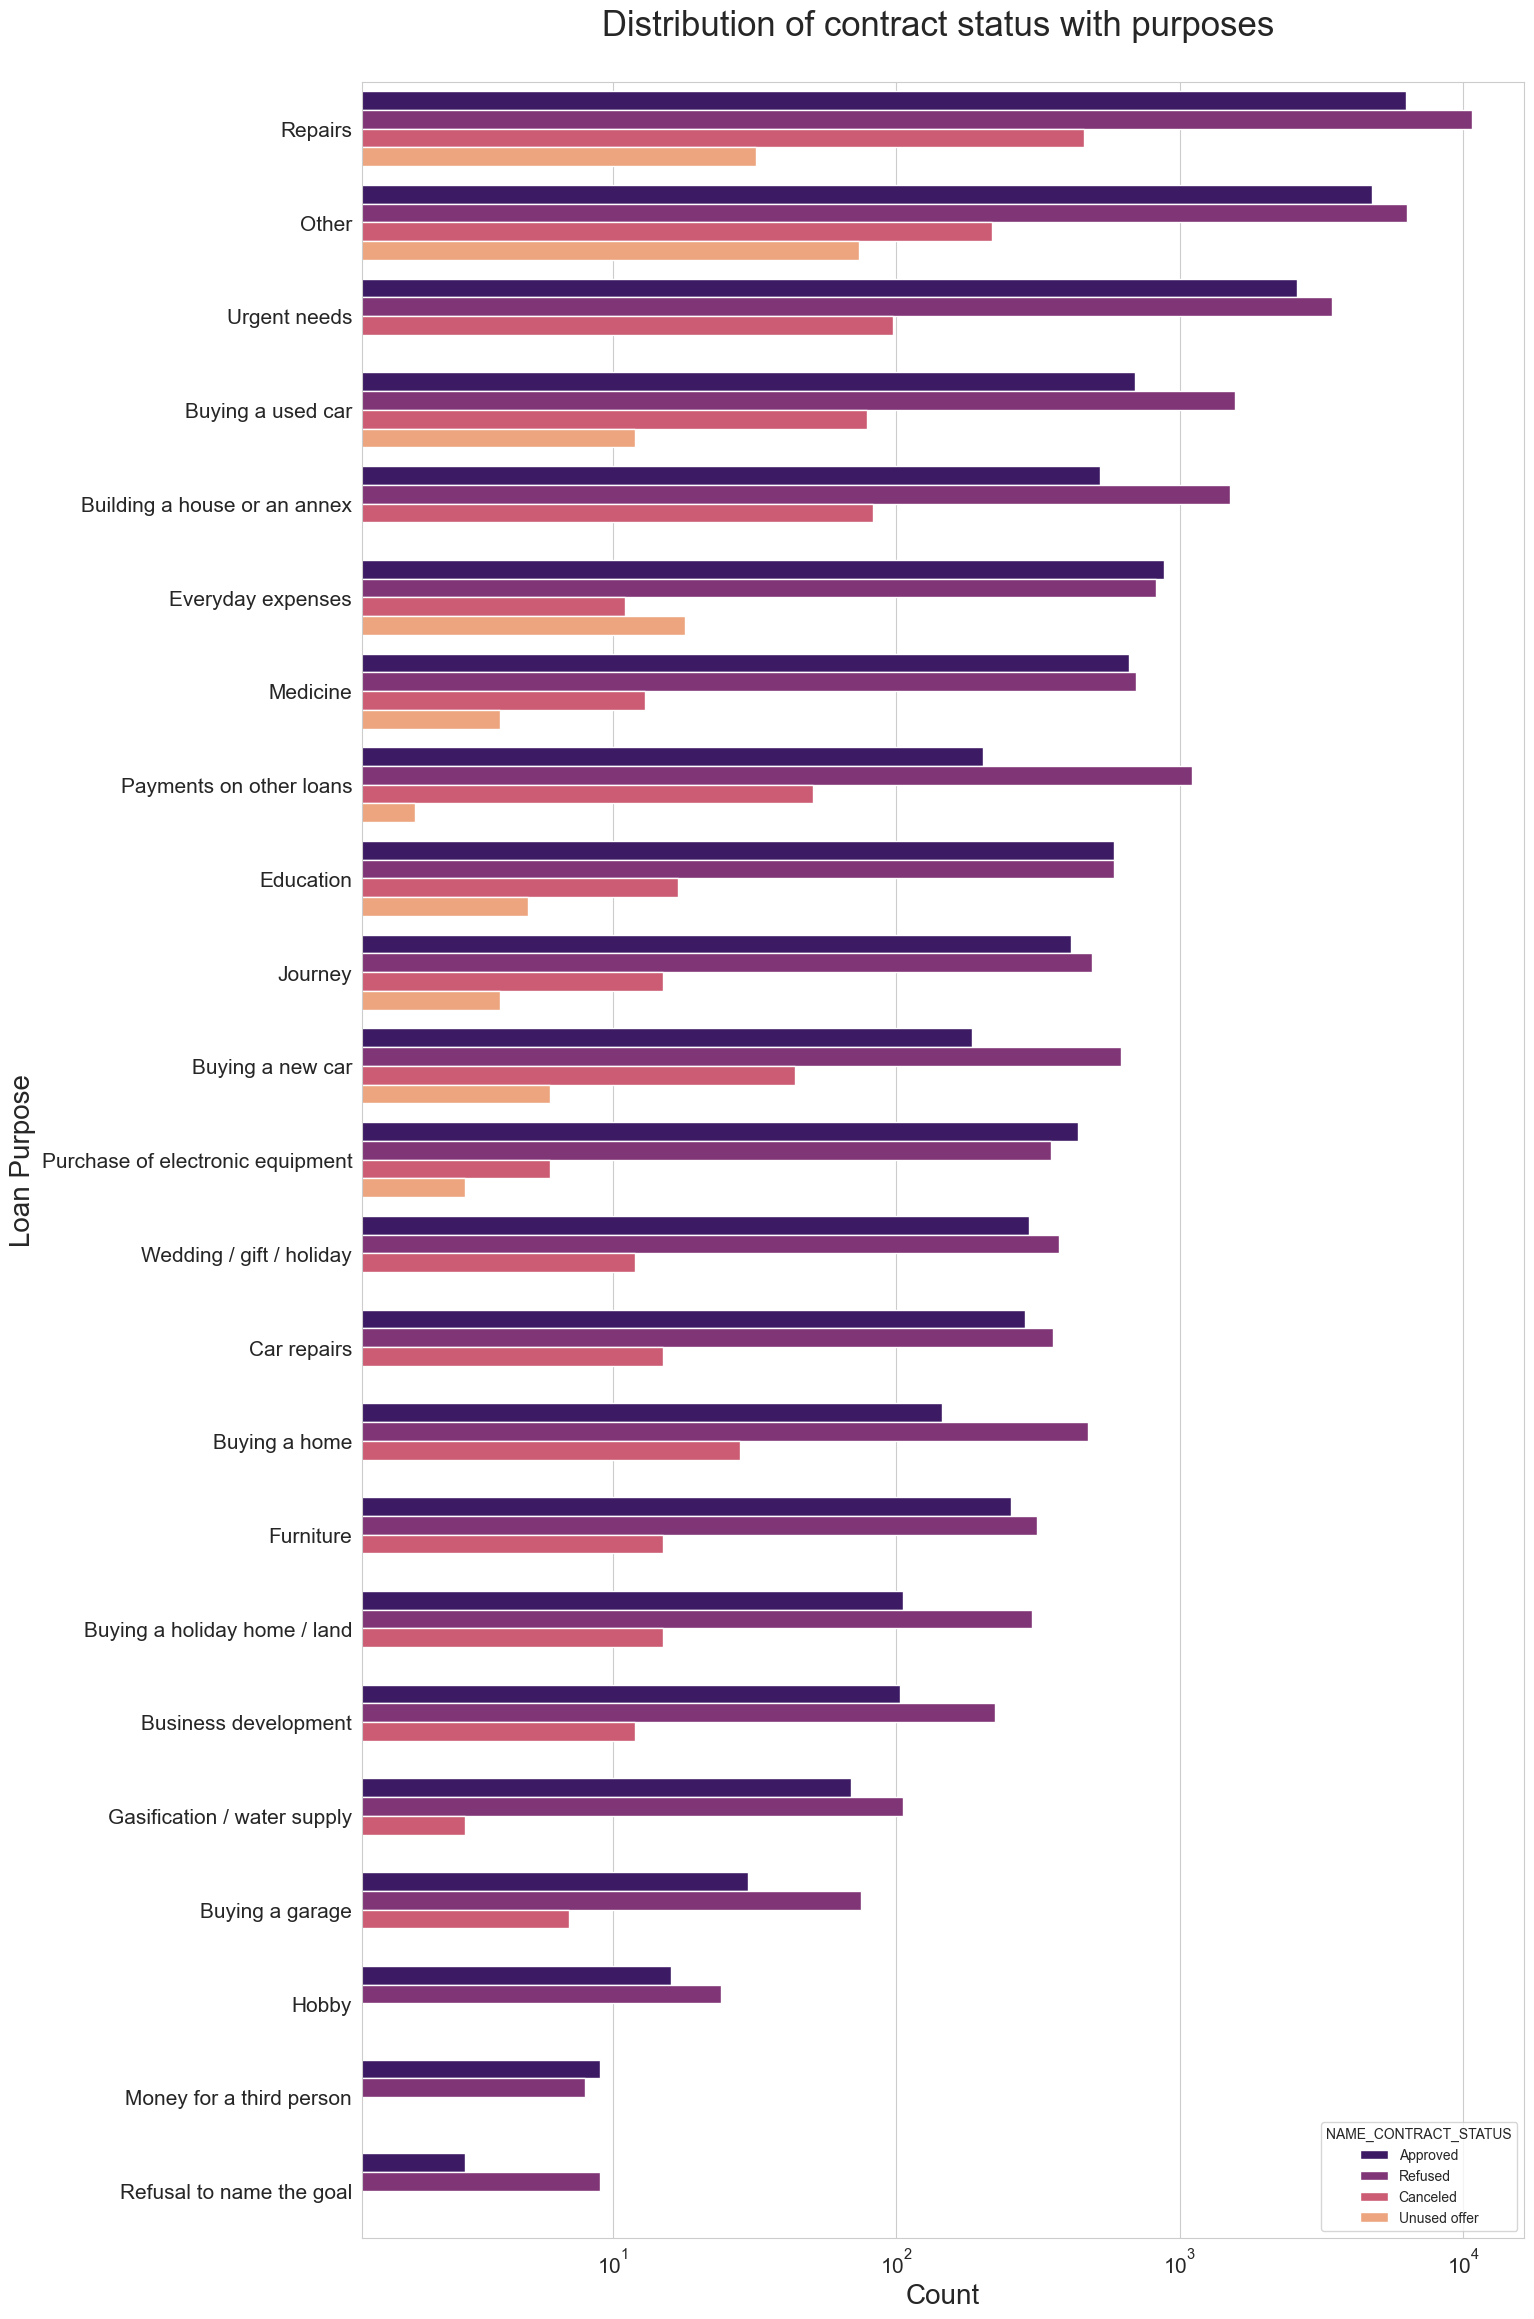

In [132]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

Conclusions from the graph:

The majority of loan rejections were for 'Repairs.'  

For education purposes, approvals and rejections were equal.  

Rejections for paying off other loans and purchasing a new car were significantly higher than approvals.

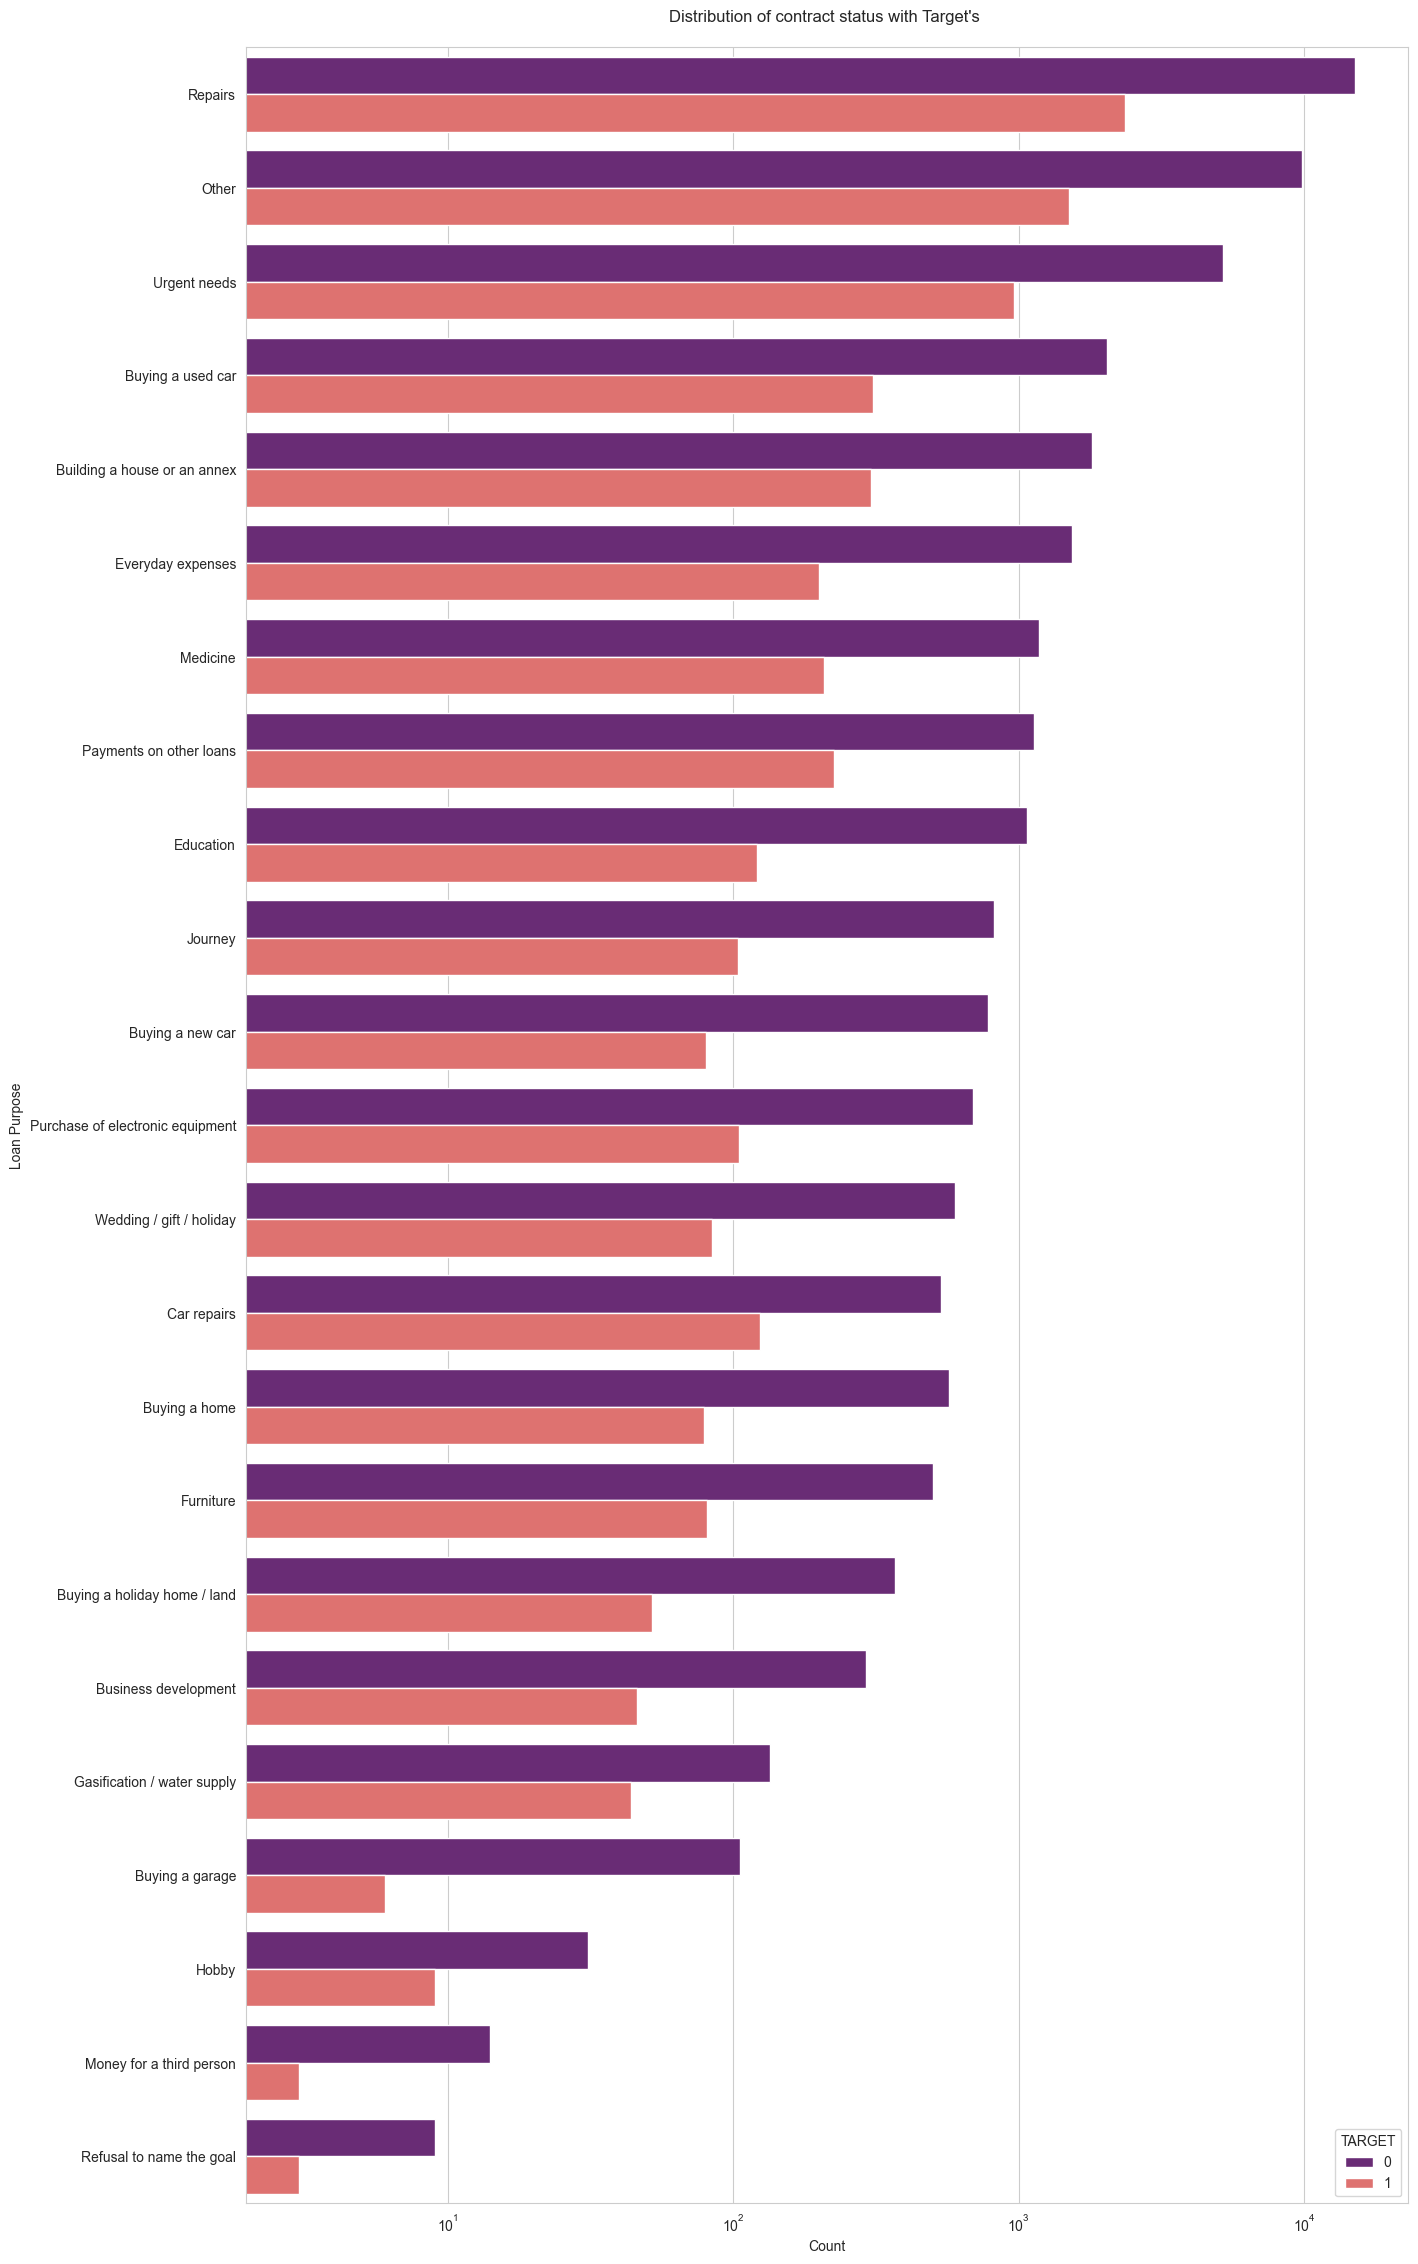

In [140]:
# Plotting for the Contract Status

plt.figure(figsize=[15,28])

sns.countplot(data=loan_merg, y='NAME_CASH_LOAN_PURPOSE', 
               order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='TARGET', palette='magma')

plt.title('Distribution of contract status with Target\'s \n')
plt.xticks()
plt.yticks()
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.xscale('log')

plt.show()

Conclusions from the graph:

Loans for 'Repairs' are experiencing the most difficulties with timely payments. 

In contrast, loan payments are significantly higher for 'Buying a garage', 'Business development', 'Buying land', 'Buying a new car', and 'Education'. Therefore, we should focus on these purposes where clients encounter minimal payment difficulties.

<h2>Performing the bivariate analysis</h2>

In [134]:
loan_merg.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'SK_ID_PREV'

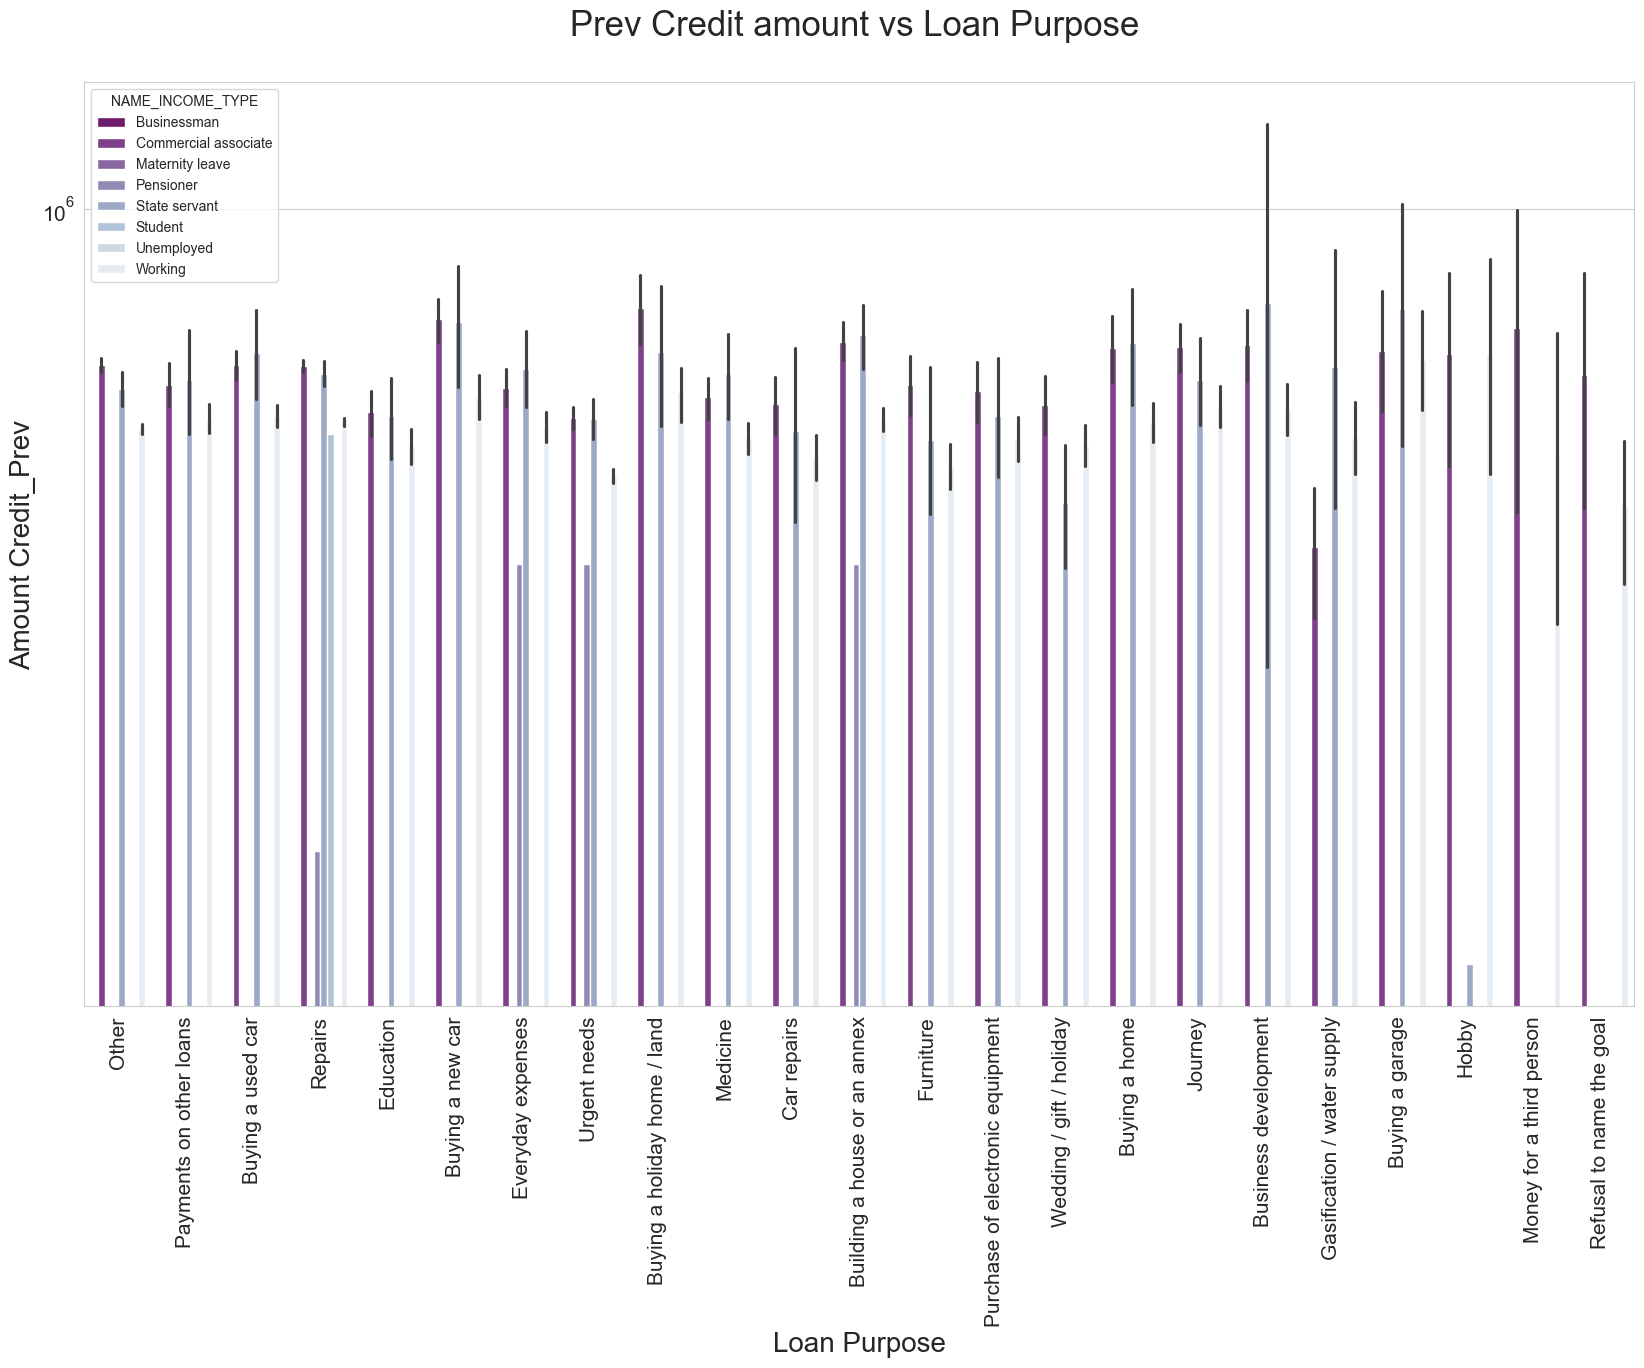

In [135]:
# Plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,12))

sns.barplot(data = loan_merg, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_x', orient='v', palette='BuPu_r')
plt.xticks(rotation=90)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)

plt.show()

The graph's conclusions indicate that the credit amounts for loan purposes such as 'Buying a home,' 'Buying land,' 'Buying a new car,' and 'Building a house' are higher. State servants applying for credit show substantial amounts, while loans for third parties or hobbies have lower application rates.

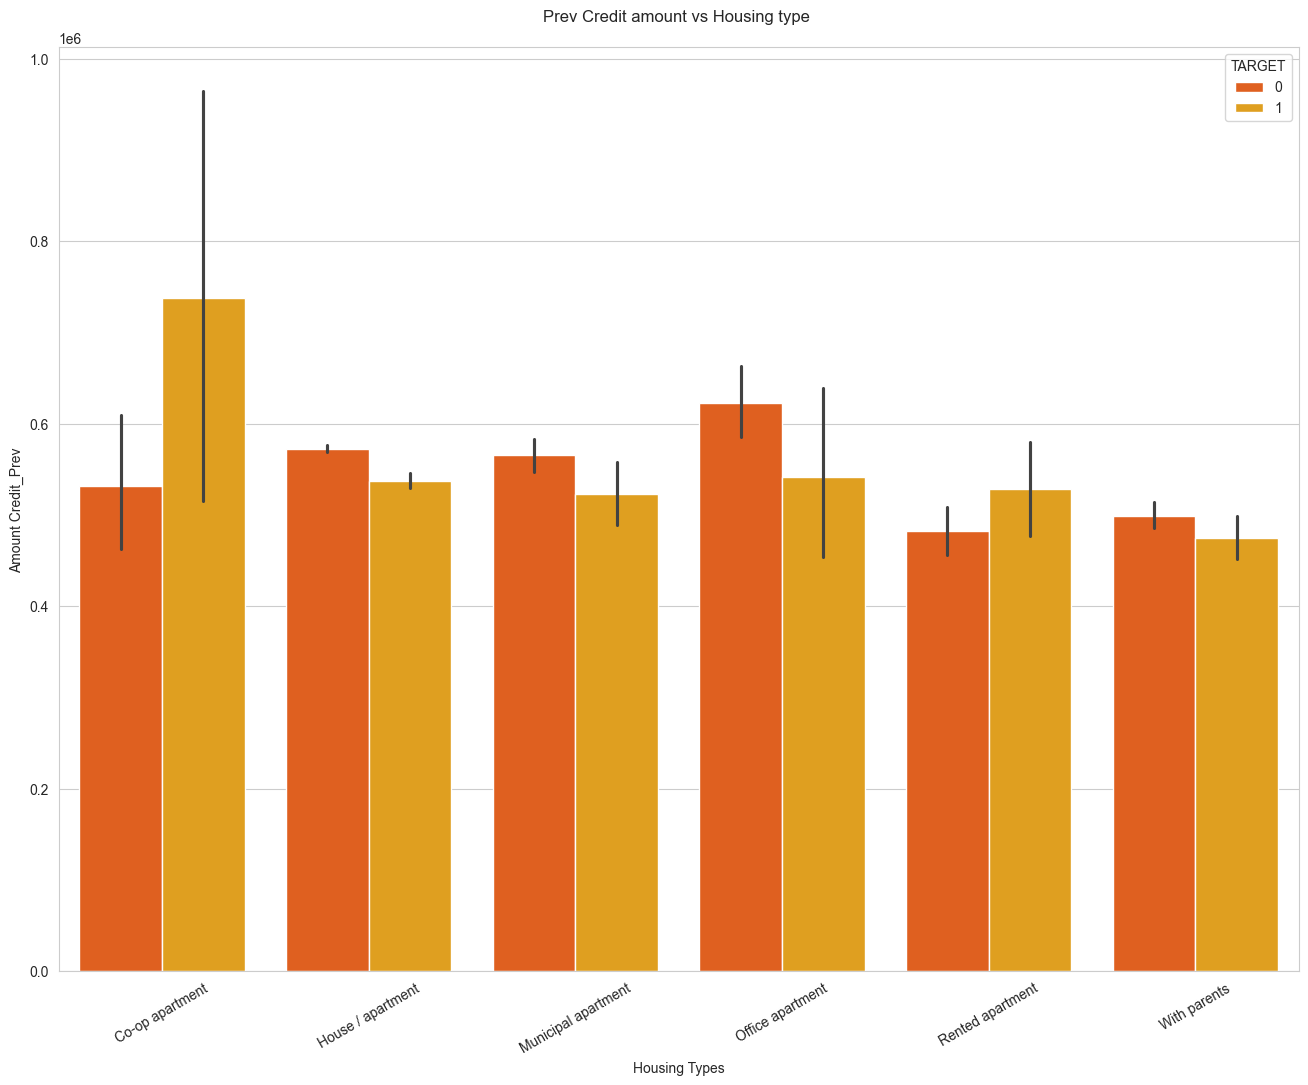

In [141]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merg, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='autumn')
plt.title('Prev Credit amount vs Housing type \n')
plt.ylabel('Amount Credit_Prev')
plt.xlabel('Housing Types')


plt.show()

Conclusion from the Graph:

The analysis shows that:

Office apartments have the highest number of loans with Target = 0 (indicating successful repayments).
Co-op apartments have the highest number of loans with Target = 1 (indicating payment difficulties).
Based on this observation:

The bank should be cautious in granting loans to applicants associated with co-op apartments, as they are more likely to face repayment challenges.
Conversely, the bank could focus on applicants from housing types like "With parents," "House/apartment," or "Municipal apartment," which show better repayment performance.


Conclusion from EDA Analysis
Based on the insights from the analysis:

Housing Type Recommendations:

Banks should prioritize loan approvals for Office apartments and Co-op apartments, as these housing types exhibit fewer payment difficulties.
Loan Purpose Recommendations:

Loans for Repairs and Other purposes demonstrate better repayment performance and should be encouraged.
Employment Type Recommendations:

Banks should target "Business Entity Type-3" and "Self-Employed" individuals, as they show a positive trend in loan repayments.
Demographic Targeting:

"Working" individuals, especially female employees, have a stronger repayment record, making them a reliable target group for loan approvals.